In [1]:
import pandas as pd
import collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
from IPython.display import display

# from rdkit import Chem 
# from rdkit.Chem import Draw

# # to get all rows and columns as output 

# pd.options.display.max_rows = 999
pd.options.display.max_columns = 999


# Loading Data

In [2]:
dataset1 = pd.read_csv('Main_dataset.csv', index_col=0)  
df_Original = dataset1.copy()
print("Shape :", df_Original.shape)
print("\n")

df_Original.head(4)

Shape : (1557, 165)




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,126,127,128,129,130,132,133,135,136,137,139,143,144,149,151,154,156,157,159,160,164,165,167,170,175,176,177,179,181,182,183,184,187,194,196,205,213,216,226,237,242,243,245,iso
0,-0.731503,5.107745,7.804457,4.635843,0.100921,7.920823,6.779093,1.000704,5.444429,7.493853,5.091432,0.909900,4.185360,8.124206,0.790962,0.100392,7.166544,5.523599,-0.639925,5.907480,3.210780,5.741961,0.176598,3.306389,2.590538,-0.309442,6.278007,1.707425,5.373954,8.946630,5.759516,3.224904,0.006796,-0.778327,2.842118,6.424682,0.131709,6.578062,4.151846,4.735085,9.142993,6.843158,1.115420,1.143735,7.287332,5.441582,0.254979,6.944905,1.022685,4.304979,8.081463,5.434969,6.677152,7.425042,1.719965,6.700023,7.458804,4.682582,0.210982,7.489435,8.137024,3.254797,6.780398,7.387209,7.135899,1.187315,8.119023,6.040684,3.889445,7.450306,6.350818,2.449219,2.875365,5.492848,8.654754,1.713628,5.518013,3.837207,8.999992,7.808598,1.347411,6.638863,7.890138,6.434524,4.701318,0.189558,5.966571,8.828703,3.359190,8.246380,6.722165,3.138948,6.056771,8.870767,0.436192,8.251677,6.675968,6.304119,-0.394640,4.708758,7.893975,6.393722,1.700035,7.454993,4.229402,6.779751,5.677712,0.922139,8.894096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,486.448614
1,-0.323777,4.821551,7.746136,4.898302,-0.063683,7.901260,6.709995,0.827481,5.489984,7.244149,5.141104,0.957934,4.184255,8.298027,0.840007,0.085100,7.157037,5.400069,-0.612665,5.975828,3.227495,5.617874,0.216020,3.280489,2.630142,-0.389068,6.434693,2.454673,6.363262,0.123990,4.823217,2.368927,8.784342,-0.820451,2.785285,6.298947,0.161205,6.405578,4.937519,5.815271,0.058229,6.845719,1.365082,1.106355,7.227311,5.464176,0.058036,7.038513,0.841843,4.071436,7.878656,5.356718,6.901620,7.777427,1.800329,6.569934,7.482194,4.569798,0.116720,7.365847,7.994941,3.171947,6.560683,7.501738,7.354174,1.168714,8.211785,6.076900,4.112028,7.417517,6.869777,2.358249,3.142999,5.575870,8.856550,1.713353,5.364766,3.974871,8.872696,7.856117,1.244391,6.658609,7.802890,6.482146,4.640150,0.203212,5.938465,8.795179,3.407297,8.023208,6.826776,3.058856,6.120314,9.094316,0.449901,8.175078,6.659344,5.376249,8.571598,4.662560,7.863808,6.484803,1.761571,7.526721,4.235555,6.745034,5.749297,1.018779,8.791506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488.819630
2,-0.468969,5.162387,7.428079,5.039972,-0.068103,7.805926,6.633251,0.942144,5.644466,7.145261,5.137682,1.073934,4.094124,8.105818,0.873346,0.240048,7.068895,5.445164,-0.754006,6.144370,3.133171,5.759028,0.228270,3.406500,2.610443,-0.202893,6.646210,1.618682,5.307966,9.032321,4.909555,2.374351,8.950947,-0.723546,2.810339,6.405395,0.226399,6.402088,4.012826,4.762552,8.999992,6.711174,1.378141,1.201321,7.407926,5.187174,0.034131,6.807114,0.792615,4.182474,8.017866,5.426061,6.669710,7.656862,1.664308,6.604322,7.392876,4.778651,0.214240,7.400086,8.095511,3.258366,6.597905,7.354420,7.249577,1.130980,8.160261,6.122645,4.149307,7.428814,6.600259,2.487076,3.365721,5.431394,8.859284,1.762581,5.379571,3.926778,8.935885,7.891439,1.308597,6.686070,7.919100,6.412711,4.693879,0.191237,5.942065,8.687446,3.391775,8.133073,6.835776,3.083246,6.051037,8.947916,0.482792,8.168898,6.671467,6.199238,-0.428276,4.809786,7.695524,6.494012,1.666696,7.525899,4.222618,6.663477,5.792919,1.000986,8.832193,0.0,0.0,0.0,0.0,0.0,

**Normalization**

In [3]:
target = df_Original.iso
features = df_Original.drop(['iso'], axis = 1)

In [4]:
def normalised_minmax(dataset):

    # normalised dataset

    # copy of datasets
    df_norm = dataset.copy()

    df=(df_norm-df_norm.min())/(df_norm.max()-df_norm.min())   #minmax Normalized dataset
    df.to_csv("dataframe_minmax_normalised.csv")
    
    return df


features=normalised_minmax(features)
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,126,127,128,129,130,132,133,135,136,137,139,143,144,149,151,154,156,157,159,160,164,165,167,170,175,176,177,179,181,182,183,184,187,194,196,205,213,216,226,237,242,243,245
0,0.011689,0.371407,0.851441,0.347117,0.032080,0.864434,0.486150,0.076047,0.593066,0.528933,0.395165,0.099335,0.301574,0.608082,0.086289,0.040677,0.534872,0.600978,0.007334,0.460148,0.349266,0.691316,0.050980,0.375640,0.216884,0.024125,0.683432,0.166696,0.402937,0.974763,0.468307,0.354573,0.000251,0.006093,0.273672,0.700452,0.108621,0.716578,0.529986,0.558490,0.995769,0.763816,0.175744,0.124930,0.804630,0.592865,0.083005,0.941766,0.154269,0.339764,0.830787,0.592672,0.473358,0.636354,0.187639,0.636146,0.575615,0.510059,0.055509,0.807689,0.886146,0.452173,0.725726,0.846483,0.884630,0.159809,0.889765,0.596687,0.503009,0.811385,0.517205,0.338472,0.314464,0.417326,0.900216,0.031962,0.807185,0.271011,0.981693,0.724459,0.069467,0.724162,0.758948,0.747419,0.513487,0.122167,0.598479,0.964884,0.444080,0.772939,0.734777,0.328588,0.475305,0.966736,0.097486,0.993205,0.728275,0.424870,0.025867,0.515813,0.966093,0.486356,0.185606,0.703949,0.424902,0.739297,0.510000,0.150536,0.972347,0.083411,0.049579,0.000000,0.135992,0.000000,0.000000,0.025713,0.015431,0.000000,0.061196,0.000000,0.000000,0.051155,0.000000,0.000000,0.084174,0.002584,0.000866,0.075637,0.000000,0.000000,0.000000,0.000000,0.000000,0.024451,0.000000,0.005126,0.070672,0.092529,0.063470,0.000000,0.020787,0.000000,0.109985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.037014,0.350251,0.845078,0.363599,0.020266,0.862299,0.481890,0.063309,0.598033,0.513646,0.398735,0.104579,0.301504,0.620638,0.091639,0.039705,0.534184,0.587502,0.009038,0.464921,0.351089,0.678618,0.053783,0.372694,0.219408,0.018551,0.700512,0.213044,0.474447,0.013509,0.409216,0.277365,0.957396,0.001628,0.269362,0.686743,0.110988,0.697789,0.613369,0.668487,0.006342,0.764054,0.203285,0.120847,0.799012,0.595327,0.066610,0.954103,0.116376,0.322137,0.812359,0.584134,0.488766,0.662822,0.196406,0.625611,0.577344,0.497774,0.043000,0.794170,0.870673,0.443297,0.699698,0.859607,0.909469,0.157811,0.899931,0.599555,0.527193,0.807814,0.554321,0.329575,0.343776,0.423000,0.919362,0.031917,0.787928,0.283037,0.967808,0.728256,0.061371,0.726316,0.751498,0.752747,0.506792,0.123909,0.595856,0.961216,0.450060,0.754390,0.746218,0.322001,0.479800,0.996846,0.098453,0.984369,0.726462,0.357220,0.896200,0.510727,0.962849,0.492819,0.192324,0.710375,0.425413,0.735509,0.515958,0.161021,0.961132,0.083411,0.049579,0.000000,0.135992,0.000000,0.000000,0.025713,0.015431,0.000000,0.061196,0.000000,0.000000,0.051155,0.000000,0.000000,0.084174,0.002584,0.000866,0.075637,0.000000,0.000000,0.000000,0.000000,0.000000,0.024451,0.000000,0.005126,0.070672,0.092529,0.063470,0.000000,0.020787,0.000000,0.109985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.027996,0.375446,0.810379,0.372496,0.019948,0.851895,0.477159,0.071741,0.614877,0.507593,0.398489,0.117243,0.295745,0.606754,0.095276,0.049553,0.527804,0.592422,0.000204,0.476694,0.340802,0.693063,0.054654,0.387028,0.218153,0.031585,0.723568,0.161191,0.398167,0.984099,0.414665,0.277854,0.975563,0.011898,0.271262,0.698349,0.116219,0.697409,0.515232,0.561287,0.980194,0.751556,0.204726,0.131220,0.815918,0.565147,0.064620,0.923606,0.106061,0.330518,0.825009,0.591700,0.472847,0.653766,0.181567,0.628396,0.570742,0.520524,0.055942,0.

In [5]:
dff =pd.concat([target, features], axis=1)
dff

,iso,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,126,127,128,129,130,132,133,135,136,137,139,143,144,149,151,154,156,157,159,160,164,165,167,170,175,176,177,179,181,182,183,184,187,194,196,205,213,216,226,237,242,243,245
0,486.448614,0.011689,0.371407,0.851441,0.347117,0.032080,0.864434,0.486150,0.076047,0.593066,0.528933,0.395165,0.099335,0.301574,0.608082,0.086289,0.040677,0.534872,0.600978,0.007334,0.460148,0.349266,0.691316,0.050980,0.375640,0.216884,0.024125,0.683432,0.166696,0.402937,0.974763,0.468307,0.354573,0.000251,0.006093,0.273672,0.700452,0.108621,0.716578,0.529986,0.558490,0.995769,0.763816,0.175744,0.124930,0.804630,0.592865,0.083005,0.941766,0.154269,0.339764,0.830787,0.592672,0.473358,0.636354,0.187639,0.636146,0.575615,0.510059,0.055509,0.807689,0.886146,0.452173,0.725726,0.846483,0.884630,0.159809,0.889765,0.596687,0.503009,0.811385,0.517205,0.338472,0.314464,0.417326,0.900216,0.031962,0.807185,0.271011,0.981693,0.724459,0.069467,0.724162,0.758948,0.747419,0.513487,0.122167,0.598479,0.964884,0.444080,0.772939,0.734777,0.328588,0.475305,0.966736,0.097486,0.993205,0.728275,0.424870,0.025867,0.515813,0.966093,0.486356,0.185606,0.703949,0.424902,0.739297,0.510000,0.150536,0.972347,0.083411,0.049579,0.000000,0.135992,0.000000,0.000000,0.025713,0.015431,0.000000,0.061196,0.000000,0.000000,0.051155,0.000000,0.000000,0.084174,0.002584,0.000866,0.075637,0.000000,0.000000,0.000000,0.000000,0.000000,0.024451,0.000000,0.005126,0.070672,0.092529,0.063470,0.000000,0.020787,0.000000,0.109985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,488.819630,0.037014,0.350251,0.845078,0.363599,0.020266,0.862299,0.481890,0.063309,0.598033,0.513646,0.398735,0.104579,0.301504,0.620638,0.091639,0.039705,0.534184,0.587502,0.009038,0.464921,0.351089,0.678618,0.053783,0.372694,0.219408,0.018551,0.700512,0.213044,0.474447,0.013509,0.409216,0.277365,0.957396,0.001628,0.269362,0.686743,0.110988,0.697789,0.613369,0.668487,0.006342,0.764054,0.203285,0.120847,0.799012,0.595327,0.066610,0.954103,0.116376,0.322137,0.812359,0.584134,0.488766,0.662822,0.196406,0.625611,0.577344,0.497774,0.043000,0.794170,0.870673,0.443297,0.699698,0.859607,0.909469,0.157811,0.899931,0.599555,0.527193,0.807814,0.554321,0.329575,0.343776,0.423000,0.919362,0.031917,0.787928,0.283037,0.967808,0.728256,0.061371,0.726316,0.751498,0.752747,0.506792,0.123909,0.595856,0.961216,0.450060,0.754390,0.746218,0.322001,0.479800,0.996846,0.098453,0.984369,0.726462,0.357220,0.896200,0.510727,0.962849,0.492819,0.192324,0.710375,0.425413,0.735509,0.515958,0.161021,0.961132,0.083411,0.049579,0.000000,0.135992,0.000000,0.000000,0.025713,0.015431,0.000000,0.061196,0.000000,0.000000,0.051155,0.000000,0.000000,0.084174,0.002584,0.000866,0.075637,0.000000,0.000000,0.000000,0.000000,0.000000,0.024451,0.000000,0.005126,0.070672,0.092529,0.063470,0.000000,0.020787,0.000000,0.109985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,493.750349,0.027996,0.375446,0.810379,0.372496,0.019948,0.851895,0.477159,0.071741,0.614877,0.507593,0.398489,0.117243,0.295745,0.606754,0.095276,0.049553,0.527804,0.592422,0.000204,0.476694,0.340802,0.693063,0.054654,0.387028,0.218153,0.031585,0.723568,0.161191,0.398167,0.984099,0.414665,0.277854,0.975563,0.011898,0.271262,0.698349,0.116219,0.697409,0.515232,0.561287,0.980194,0.751556,0.204726,0.131220,0.815918,0.565147,0.064620,0.923606,0.106061,0.330518,0.825009,0.591700,0.472847,0.653766,0.181567,0

## Separating Internal and  External Testing data

In [6]:
data = dff.sample(frac=0.9, random_state=786)
data_unseen = dff.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1401, 165)
Unseen Data For Predictions: (156, 165)


In [7]:
Dataset_Training=data
Dataset_Ext_Testing=data_unseen

In [8]:
Dataset_Ext_Testing

,iso,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,126,127,128,129,130,132,133,135,136,137,139,143,144,149,151,154,156,157,159,160,164,165,167,170,175,176,177,179,181,182,183,184,187,194,196,205,213,216,226,237,242,243,245
0,490.771366,0.051919,0.336779,0.830249,0.356531,0.030720,0.845680,0.473673,0.052838,0.628988,0.503362,0.380463,0.135432,0.302083,0.615441,0.093092,0.039177,0.542967,0.583214,0.010050,0.460711,0.343476,0.704422,0.066776,0.376768,0.216589,0.025486,0.708801,0.224202,0.473032,0.007245,0.402077,0.284266,0.977957,0.927594,0.266350,0.678422,0.106164,0.740040,0.539390,0.585479,0.984446,0.747784,0.208044,0.114818,0.814145,0.598159,0.070252,0.904276,0.095823,0.329904,0.809020,0.582811,0.473473,0.646556,0.164594,0.635019,0.581426,0.490611,0.067383,0.777956,0.874034,0.445882,0.716157,0.841032,0.876744,0.184394,0.903051,0.612378,0.550261,0.842852,0.553113,0.353271,0.327511,0.468099,0.064258,0.024263,0.793923,0.277536,0.986401,0.715493,0.063027,0.737316,0.759071,0.743728,0.507506,0.138167,0.582820,0.955478,0.444514,0.764509,0.734576,0.333320,0.484681,0.972946,0.097967,0.980500,0.730590,0.412367,0.021939,0.513285,0.953344,0.489602,0.181795,0.712034,0.422529,0.747062,0.499282,0.165166,0.959847,0.083411,0.049579,0.000000,0.135992,0.000000,0.000000,0.025713,0.015431,0.000000,0.061196,0.000000,0.000000,0.051155,0.000000,0.000000,0.084174,0.002584,0.000866,0.075637,0.000000,0.000000,0.000000,0.000000,0.000000,0.024451,0.000000,0.005126,0.070672,0.092529,0.063470,0.000000,0.020787,0.000000,0.109985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,485.171461,0.003461,0.388639,0.847743,0.335359,0.046070,0.853208,0.503203,0.070517,0.574750,0.524431,0.401397,0.103867,0.288781,0.590969,0.119033,0.028271,0.526241,0.613632,0.010240,0.459410,0.351920,0.696512,0.049934,0.366206,0.219720,0.009088,0.674222,0.160625,0.397498,0.959803,0.481081,0.354772,0.024458,0.012799,0.277227,0.728609,0.116184,0.723662,0.530301,0.565596,0.992718,0.749402,0.150809,0.095345,0.811301,0.579216,0.091352,0.950169,0.166336,0.350483,0.830740,0.609217,0.488967,0.649804,0.189402,0.618502,0.563182,0.493072,0.089585,0.818283,0.891887,0.456954,0.731703,0.871625,0.863421,0.148992,0.865347,0.594103,0.508351,0.820067,0.512725,0.338138,0.288985,0.417927,0.888494,0.025531,0.794208,0.275819,0.984909,0.730174,0.068110,0.724332,0.756264,0.739975,0.514753,0.122533,0.612718,0.956272,0.446465,0.764416,0.740513,0.324314,0.474397,0.985057,0.097807,0.990221,0.724748,0.427006,0.030161,0.510930,0.979925,0.496084,0.194299,0.703552,0.428254,0.745479,0.502669,0.145738,0.961975,0.083411,0.049579,0.000000,0.135992,0.000000,0.000000,0.025713,0.015431,0.000000,0.061196,0.000000,0.000000,0.051155,0.000000,0.000000,0.084174,0.002584,0.000866,0.075637,0.000000,0.000000,0.000000,0.000000,0.000000,0.024451,0.000000,0.005126,0.070672,0.092529,0.063470,0.000000,0.020787,0.000000,0.109985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,489.183118,0.024058,0.372414,0.849407,0.366629,0.027836,0.837962,0.479991,0.077124,0.597683,0.526410,0.380665,0.111147,0.300070,0.603063,0.089816,0.035526,0.521586,0.619664,0.006372,0.463441,0.358781,0.699041,0.062407,0.368922,0.217264,0.017397,0.701002,0.159534,0.413243,0.980497,0.414183,0.264548,0.983735,0.013481,0.281484,0.686423,0.106892,0.701311,0.625419,0.656126,0.000700,0.765221,0.165067,0.109019,0.786018,0.592295,0.074334,0.973741,0.167683,0.328493,0.834389,0.578231,0.467785,0.627274,0.202298,0

In [9]:
stop

NameError: name 'stop' is not defined

#### **External Testing Data**

In [10]:
Dataset_Ext_Testing.to_excel("Dataset_Ext_Testing.xlsx")
Dataset_Ext_Testing

,iso,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,126,127,128,129,130,132,133,135,136,137,139,143,144,149,151,154,156,157,159,160,164,165,167,170,175,176,177,179,181,182,183,184,187,194,196,205,213,216,226,237,242,243,245
0,490.771366,0.051919,0.336779,0.830249,0.356531,0.030720,0.845680,0.473673,0.052838,0.628988,0.503362,0.380463,0.135432,0.302083,0.615441,0.093092,0.039177,0.542967,0.583214,0.010050,0.460711,0.343476,0.704422,0.066776,0.376768,0.216589,0.025486,0.708801,0.224202,0.473032,0.007245,0.402077,0.284266,0.977957,0.927594,0.266350,0.678422,0.106164,0.740040,0.539390,0.585479,0.984446,0.747784,0.208044,0.114818,0.814145,0.598159,0.070252,0.904276,0.095823,0.329904,0.809020,0.582811,0.473473,0.646556,0.164594,0.635019,0.581426,0.490611,0.067383,0.777956,0.874034,0.445882,0.716157,0.841032,0.876744,0.184394,0.903051,0.612378,0.550261,0.842852,0.553113,0.353271,0.327511,0.468099,0.064258,0.024263,0.793923,0.277536,0.986401,0.715493,0.063027,0.737316,0.759071,0.743728,0.507506,0.138167,0.582820,0.955478,0.444514,0.764509,0.734576,0.333320,0.484681,0.972946,0.097967,0.980500,0.730590,0.412367,0.021939,0.513285,0.953344,0.489602,0.181795,0.712034,0.422529,0.747062,0.499282,0.165166,0.959847,0.083411,0.049579,0.000000,0.135992,0.000000,0.000000,0.025713,0.015431,0.000000,0.061196,0.000000,0.000000,0.051155,0.000000,0.000000,0.084174,0.002584,0.000866,0.075637,0.000000,0.000000,0.000000,0.000000,0.000000,0.024451,0.000000,0.005126,0.070672,0.092529,0.063470,0.000000,0.020787,0.000000,0.109985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,485.171461,0.003461,0.388639,0.847743,0.335359,0.046070,0.853208,0.503203,0.070517,0.574750,0.524431,0.401397,0.103867,0.288781,0.590969,0.119033,0.028271,0.526241,0.613632,0.010240,0.459410,0.351920,0.696512,0.049934,0.366206,0.219720,0.009088,0.674222,0.160625,0.397498,0.959803,0.481081,0.354772,0.024458,0.012799,0.277227,0.728609,0.116184,0.723662,0.530301,0.565596,0.992718,0.749402,0.150809,0.095345,0.811301,0.579216,0.091352,0.950169,0.166336,0.350483,0.830740,0.609217,0.488967,0.649804,0.189402,0.618502,0.563182,0.493072,0.089585,0.818283,0.891887,0.456954,0.731703,0.871625,0.863421,0.148992,0.865347,0.594103,0.508351,0.820067,0.512725,0.338138,0.288985,0.417927,0.888494,0.025531,0.794208,0.275819,0.984909,0.730174,0.068110,0.724332,0.756264,0.739975,0.514753,0.122533,0.612718,0.956272,0.446465,0.764416,0.740513,0.324314,0.474397,0.985057,0.097807,0.990221,0.724748,0.427006,0.030161,0.510930,0.979925,0.496084,0.194299,0.703552,0.428254,0.745479,0.502669,0.145738,0.961975,0.083411,0.049579,0.000000,0.135992,0.000000,0.000000,0.025713,0.015431,0.000000,0.061196,0.000000,0.000000,0.051155,0.000000,0.000000,0.084174,0.002584,0.000866,0.075637,0.000000,0.000000,0.000000,0.000000,0.000000,0.024451,0.000000,0.005126,0.070672,0.092529,0.063470,0.000000,0.020787,0.000000,0.109985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,489.183118,0.024058,0.372414,0.849407,0.366629,0.027836,0.837962,0.479991,0.077124,0.597683,0.526410,0.380665,0.111147,0.300070,0.603063,0.089816,0.035526,0.521586,0.619664,0.006372,0.463441,0.358781,0.699041,0.062407,0.368922,0.217264,0.017397,0.701002,0.159534,0.413243,0.980497,0.414183,0.264548,0.983735,0.013481,0.281484,0.686423,0.106892,0.701311,0.625419,0.656126,0.000700,0.765221,0.165067,0.109019,0.786018,0.592295,0.074334,0.973741,0.167683,0.328493,0.834389,0.578231,0.467785,0.627274,0.202298,0

#### **Training data**

In [11]:
Dataset_Training.to_excel('Dataset_Training.xlsx')
Dataset_Training

,iso,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,126,127,128,129,130,132,133,135,136,137,139,143,144,149,151,154,156,157,159,160,164,165,167,170,175,176,177,179,181,182,183,184,187,194,196,205,213,216,226,237,242,243,245
0,489.384411,0.115909,0.172371,0.849477,0.383732,0.134514,0.339702,0.319760,0.240752,0.515815,0.241213,0.345231,0.397321,0.160049,0.046717,0.255069,0.256840,0.034104,0.289142,0.301039,0.350775,0.623740,0.263489,0.379115,0.305974,0.415271,0.253287,0.301391,0.188013,0.114305,0.820950,0.061444,0.470748,0.838747,0.600015,0.032537,0.832387,0.635514,0.592506,0.859320,0.550490,0.088965,0.494930,0.889603,0.081421,0.139586,0.587282,0.008994,0.764832,0.569994,0.427418,0.072399,0.347496,0.146321,0.693599,0.695407,0.215374,0.384139,0.959373,0.693576,0.184265,0.977895,0.973839,0.210287,0.711426,0.082319,0.022768,0.677278,0.430450,0.527384,0.999680,0.563756,0.143931,0.091371,0.528514,0.529246,0.602360,0.125560,0.520981,0.088169,0.441030,0.549519,0.585890,0.638312,0.808915,0.188328,0.956676,0.714922,0.476358,0.048329,0.674049,0.860073,0.351553,0.479272,0.762401,0.574348,0.134210,0.869466,0.397082,0.425370,0.806562,0.485731,0.301603,0.567857,0.262018,0.453485,0.289305,0.268186,0.141146,0.268362,0.387504,0.278549,0.332583,0.310082,0.184938,0.897154,0.325945,0.233938,0.141267,0.410349,0.268977,0.448637,0.903213,0.065957,0.856865,0.799171,0.440926,0.004086,0.687251,0.231008,0.839217,0.742195,0.672980,0.764876,0.395308,0.184148,0.286837,0.100767,0.092529,0.06347,0.000000,0.020787,0.000000,0.109985,0.00000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,495.937488,0.278869,0.156421,0.793646,0.221805,0.437578,0.353293,0.172732,0.066174,0.300436,0.219453,0.308583,0.065304,0.028675,0.647296,0.126457,0.579268,0.068939,0.154355,0.243984,0.071447,0.360083,0.271742,0.225524,0.094365,0.271976,0.464091,0.493898,0.250012,0.092310,0.706824,0.068974,0.482113,0.827640,0.603690,0.031994,0.845164,0.647865,0.597089,0.886967,0.572387,0.063918,0.517099,0.881491,0.093911,0.145582,0.585471,0.009318,0.756464,0.580559,0.370392,0.885270,0.368862,0.159616,0.700733,0.682652,0.225124,0.385878,0.966776,0.691341,0.203246,0.970114,0.029844,0.210760,0.711836,0.111473,0.034591,0.712778,0.441503,0.534734,0.970783,0.539640,0.171266,0.117996,0.543060,0.526305,0.600929,0.153795,0.524379,0.102084,0.463194,0.538475,0.605325,0.674667,0.844357,0.200351,0.968011,0.710940,0.492094,0.066087,0.686173,0.877108,0.352306,0.479775,0.770454,0.577624,0.124766,0.876860,0.407296,0.417543,0.796229,0.368973,0.097401,0.384117,0.229254,0.347900,0.138185,0.086539,0.104357,0.168446,0.290426,0.541899,0.411797,0.432951,0.191581,0.710089,0.302984,0.227936,0.439708,0.418335,0.301103,0.464177,0.916849,0.065603,0.875360,0.813705,0.442863,0.011935,0.694756,0.244946,0.835186,0.747113,0.672660,0.775204,0.401186,0.186875,0.284275,0.105937,0.092529,0.06347,0.000000,0.020787,0.000000,0.109985,0.00000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,487.371438,0.450033,0.187619,0.404844,0.276963,0.196194,0.072569,0.235775,0.456646,0.218829,0.129080,0.191053,0.543331,0.009878,0.226158,0.194891,0.562982,0.113453,0.186977,0.240086,0.491120,0.369368,0.197021,0.213688,0.392962,0.189353,0.170359,0.108943,0.391538,0.132366,0.334104,0.074022,0.463092,0.845256,0.606664,0.021039,0.844093,0.648998,0.599610,0.858319,0.543135,0.115632,0.521573,0.884716,0.088333,0.132287,0.612118,0.007569,0.746174,0.635041,0.401447,0.888067,0.347306,0.147045,0.674904,0.729684,0.230866,0.399182,0.966526,0.675960,0.184023,0.983617,0.020652,0.203486,0.722013,0.110711,0.033346,0.717600,0.504503,0.640198,0.008342,0.557113,0.153053,0.0990

# Modelling

## Modelling using Machine Learning - Method-1

### Featurization

In [12]:
def rel_feature(dataset, target, thres, corr_method):
    
    cor = dataset.corr(method=corr_method)
    cor_target = abs(cor[target])
    #Selecting highly correlated features
    Relevant_Features_Original = cor_target[cor_target>thres]
    print("Relevant_Features_Original \n \n ", Relevant_Features_Original, '\n' )

    Relevant_Features =dataset.loc[:, abs(dataset.corr(method=corr_method)[target]) > thres]
    return Relevant_Features


# rel_feature(dataset, target, thres)

# corr_method = {‘pearson’, ‘kendall’, ‘spearman’} 


Relevant_Features_Original 
 
  iso    1.000000
3      0.428800
30     0.446357
31     0.525035
34     0.575274
35     0.440124
42     0.460868
54     0.558531
66     0.532855
68     0.582706
81     0.435080
87     0.427213
92     0.518733
100    0.413609
105    0.453351
108    0.491229
112    0.466318
115    0.467872
118    0.455007
132    0.457694
157    0.410057
160    0.526482
170    0.414770
213    0.408186
237    0.410133
Name: iso, dtype: float64 



<AxesSubplot:>

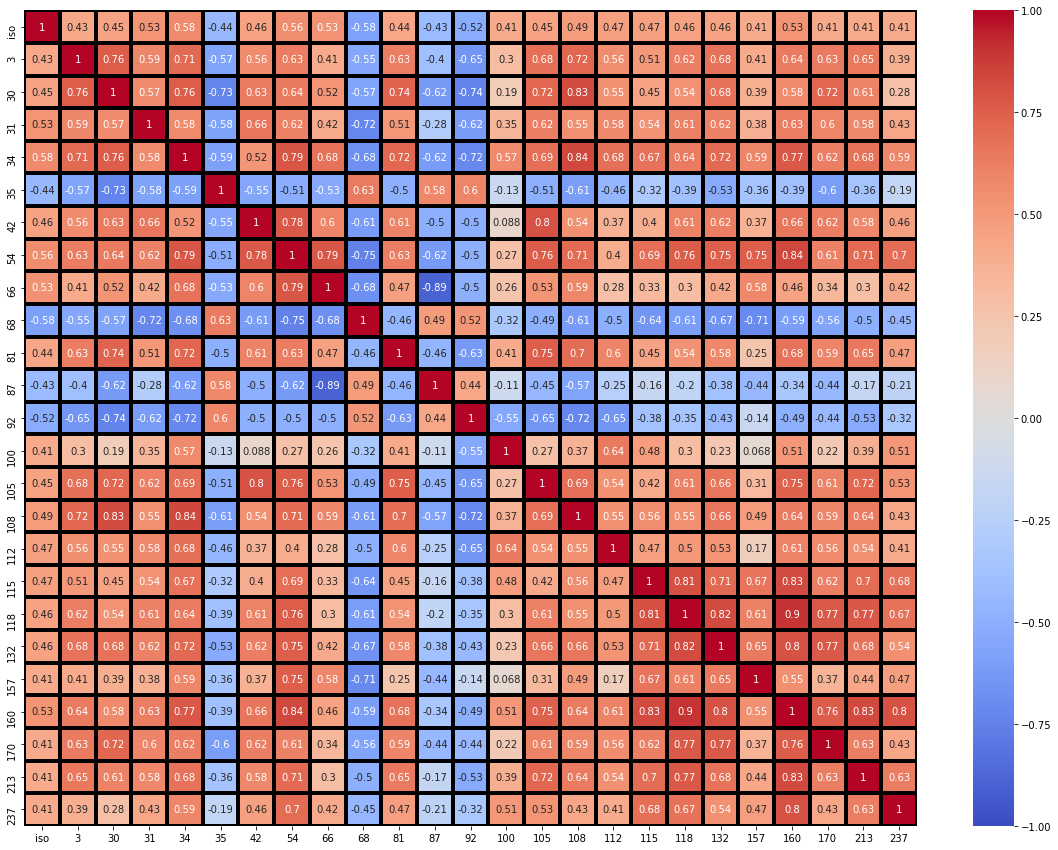

In [13]:
# Pearson's correlation

Relevant_Features_Pearson=rel_feature(Dataset_Training,'iso', 0.4,'pearson')
# df_feature.to_csv("feature.csv")
Relevant_Features_Pearson
# Relevant_Features_Pearson.to_csv("FEATURE_Pearson_correlation_method.csv")
Relevant_Features_Pearson

plt.subplots(figsize=(20,15))
sns.heatmap(Relevant_Features_Pearson.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


In [14]:
df=Relevant_Features_Pearson
df.shape

(1401, 25)

In [15]:
target = df.iso
features = df.drop(['iso'], axis = 1)

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.1, random_state = 0)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

#Further divide training dataset into train and validation dataset with an 90:10 split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=2018)

print('Training dataset shape:', X_val.shape, y_val.shape)


Training dataset shape: (1260, 24) (1260,)
Testing dataset shape: (141, 24) (141,)
Training dataset shape: (126, 24) (126,)


### Synthetic Data generation

In [17]:
def SMOGN(dataset, target, k_value, samp, thres, rel, rel_type,coef):
    
    import smogn
    df2 = smogn.smoter(

        ## main arguments
        data = dataset,           ## pandas dataframe
        y = target,          ## string ('header name')
        k = k_value,                    ## positive integer (k < n)
        samp_method = samp,  ## string ('balance' or 'extreme')

        ## phi relevance arguments
        rel_thres = thres,         ## positive real number (0 < R < 1)
        rel_method = rel,      ## string ('auto' or 'manual')
        rel_xtrm_type = rel_type,   ## string ('low' or 'both' or 'high')
        rel_coef = coef          ## positive real number (0 < R)

    )

    import seaborn

    seaborn.kdeplot(dataset[target], label = "Original")
    seaborn.kdeplot(df2[target], label = "SMOGN")
    
    return df2


# SMOGN(df, 'LUMO', 9, 'balance', 0.8, 'auto','both', 2)



In [18]:
Train_set = pd.concat([y_train,X_train], axis=1)
Train_set=Train_set.reset_index()
# Train_set = Train_set.drop('Index', axis = 1)
Train_set = Train_set[Train_set.columns.drop((Train_set.filter(regex='dex')))]

Train_set

,iso,3,30,31,34,35,42,54,66,68,81,87,92,100,105,108,112,115,118,132,157,160,170,213,237
0,488.518323,0.217132,0.063810,0.481988,0.057495,0.848519,0.521725,0.155312,0.112302,0.704183,0.432778,0.942243,0.901024,0.425909,0.490168,0.038298,0.855811,0.174598,0.055085,0.014265,0.063470,0.020787,0.000000,0.000000,0.000000
1,488.128917,0.221134,0.073328,0.452582,0.036889,0.839196,0.512964,0.143419,0.097574,0.717892,0.416772,0.921425,0.884662,0.400468,0.273162,0.106214,0.381076,0.219097,0.216074,0.006656,0.063470,0.020787,0.000000,0.000000,0.000000
2,503.696822,0.484358,0.463378,0.864401,0.576425,0.016869,0.767832,0.324886,0.941547,0.296756,0.708784,0.376850,0.112956,0.845963,0.506051,0.654367,0.785488,0.276136,0.015431,0.000866,0.063470,0.020787,0.000000,0.000000,0.000000
3,492.841057,0.180428,0.079181,0.471367,0.035991,0.847657,0.510824,0.155975,0.094883,0.692165,0.453206,0.946763,0.867686,0.453942,0.282206,0.021129,0.043288,0.261222,0.175358,0.019526,0.063470,0.020787,0.000000,0.000000,0.000000
4,495.954396,0.075361,0.585063,0.969394,0.984781,0.033137,0.950311,0.983785,0.952681,0.056154,0.981617,0.450214,0.369702,0.968282,0.983121,0.926195,0.963451,0.923210,0.969817,0.749471,0.792668,0.955882,0.608442,0.762225,0.999321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,494.429567,0.352533,0.403472,0.274668,0.280429,0.696767,0.752019,0.487778,0.881209,0.890580,0.728992,0.123519,0.747544,0.023129,0.703486,0.506390,0.049579,0.000000,0.015431,0.000866,0.063470,0.020787,0.000000,0.000000,0.000000
1130,489.102525,0.329601,0.366451,0.438688,0.337318,0.406791,0.524697,0.495166,0.838896,0.197268,0.800667,0.446861,0.937830,0.224113,0.100754,0.488845,0.041384,0.542679,0.299799,0.238456,0.862976,0.032144,0.102474,0.000000,0.000000
1131,489.688545,0.429023,0.400486,0.583641,0.296762,0.541245,0.521903,0.486894,0.692806,0.278744,0.090548,0.466856,0.976077,0.236184,0.111188,0.506508,0.028862,0.570768,0.322602,0.276082,0.884190,0.014765,0.125406,0.000000,0.000000
1132,490.655993,0.284615,0.062902,0.505544,0.040983,0.817147,0.503217,0.152697,0.109726,0.681174,0.459814,0.958994,0.846482,0.433364,0.093588,0.190929,0.325070,0.489753,0.098226,0.015387,0.063470,0.020787,0.000000,0.000000,0.000000


In [19]:
# Smogn_feature=SMOGN(Train_set, 'cal_ox', 9, 'balance', 0.8, 'auto','both', 2)

# y_train = Smogn_feature.cal_ox
# X_train = Smogn_feature.drop(['cal_ox'], axis = 1)




In [20]:
# seaborn.kdeplot(Smogn_feature["ox"], label = "SMOGN")
# seaborn.kdeplot(Train_set["ox"], label = "Original")

### Preliminary comparison among different models to select best

In [126]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# print(models)

# models

models= models[models['R-Squared'] >= 0]
models.to_csv("ML_models.csv")
models

 93%|████████████████████████████████████████████████████████████████████████████▎     | 40/43 [00:06<00:00,  7.60it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
[17:48:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:06<00:00,  6.86it/s]

In [132]:
models=models.round(2)
models.to_csv("ML_models.csv")

### Modelling top 10 Models

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import  TheilSenRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import NuSVR#Creating Random Forest Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR


from sklearn.linear_model import SGDRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


from scipy import stats 
from scipy.special import boxcox1p
import statsmodels.api as sm



from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.impute import KNNImputer

# for feature slection
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import r2_score,mean_absolute_error,median_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


#### RandomForestRegressor

In [26]:
#Creating Random Forest Regressor
rf_regressor=RandomForestRegressor(random_state=6)
rf_regressor.fit(X_train, y_train.values)

# Predicting the Validation set results
y_pred = rf_regressor.predict(X_test)

print('R2 score of training data for Random Forest regression is {0} %'.format(round(r2_score(y_train, rf_regressor.predict(X_train)),2)*100))
print('R2 score of testing data for Random Forest regression is {0} %'.format(round(r2_score(y_test, y_pred),2)*100))
print('RMSE of of testing data for Random Forest regression is {0}'.format(round(mean_squared_error(y_test, y_pred,squared=False),3)))
print('MAE of testing data for Random Forest regression is {0}'.format(round(mean_absolute_error(y_test, y_pred),3)))
print('Median Absolute Error of testing data for Random Forest regression is {0}'.format(round(median_absolute_error(y_test, y_pred),3)))

# Using Randomized Searched CV for RF

parameters = {
    'n_estimators' :[50,100,200,300,400,500,600,700,800,900,1000],
    'criterion' : ["mse", "friedman_mse", "mae"],
    'max_features' : ['auto','sqrt','log2'],
    'max_depth' : [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],
    'min_samples_split' : [5,10,20,30,40,50,60,70,80,90,100],
    'bootstrap':[True],
    'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100],
}
RF_cv = RandomizedSearchCV(estimator=rf_regressor,param_distributions=parameters,n_iter=30,cv=5,n_jobs=-1)
RF_cv.fit(X_train,y_train.values.ravel())
print(RF_cv)


# Random Forest After Hyperparameter Tuning

#Creating Random Forest Regressor
rf_regressor=RF_cv.best_estimator_
rf_regressor.fit(X_train, y_train.values)

# Predicting the Validation set results
y_pred = rf_regressor.predict(X_test)

print('R2 score of training data for Random Forest regression is {0} %'.format(round(r2_score(y_train, rf_regressor.predict(X_train)),2)*100))
print('R2 score of Testing data for Random Forest regression is {0} %'.format(round(r2_score(y_test, y_pred),2)*100))
print('RMSE of of Testing data for Random Forest regression is {0}'.format(round(mean_squared_error(y_test, y_pred,squared=False),3)))
print('MAE of Testing data for Random Forest regression is {0}'.format(round(mean_absolute_error(y_test, y_pred),3)))
print('Median Absolute Error of Testing data for Random Forest regression is {0}'.format(round(median_absolute_error(y_test, y_pred),3)))

R2 score of training data for Random Forest regression is 93.0 %
R2 score of testing data for Random Forest regression is 41.0 %
RMSE of of testing data for Random Forest regression is 3.513
MAE of testing data for Random Forest regression is 2.855
Median Absolute Error of testing data for Random Forest regression is 2.376
RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=6),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
  

#### NuSVR

In [29]:
from sklearn.svm import NuSVR#Creating Random Forest Regressor
NuSVR_regressor= NuSVR()


NuSVR_regressor.fit(X_train, y_train.values)

# Predicting the Validation set results
y_pred = NuSVR_regressor.predict(X_test)

print('R2 score of training data for Ridge regression is {0} %'.format(round(r2_score(y_train, NuSVR_regressor.predict(X_train)),2)*100))
print('R2 score of testing data for Ridge regression is {0} %'.format(round(r2_score(y_test, y_pred),2)*100))
print('RMSE of of testing data for Ridge regression is {0}'.format(round(mean_squared_error(y_test, y_pred,squared=False),3)))
print('MAE of testing data for Ridge regression is {0}'.format(round(mean_absolute_error(y_test, y_pred),3)))
print('Median Absolute Error of testing data for Ridge regression is {0}'.format(round(median_absolute_error(y_test, y_pred),3)))




print("\n")

print(NuSVR_regressor.get_params().keys())




# # Using Randomized Searched CV for RF

parameters = {
#     'c' :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,4,6,8,10],
    'kernel' : ["linear", "poly", "rbf",'sigmoid'],
    'gamma' : ['scale','auto'],
#     'epsilon' :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,4,6,8,10],

# #     'max_depth' : [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],
# #     'min_samples_split' : [5,10,20,30,40,50,60,70,80,90,100],
# #     'bootstrap':[True],
# #     'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100],
}
NuSVR_cv = RandomizedSearchCV(estimator=NuSVR_regressor,param_distributions=parameters,n_iter=30,cv=5,n_jobs=-1)
NuSVR_cv.fit(X_train,y_train.values.ravel())
print(NuSVR_cv)



print("\n")


# Random Forest After Hyperparameter Tuning

#Creating Random Forest Regressor
NuSVR_regressor=NuSVR_cv.best_estimator_
NuSVR_regressor.fit(X_train, y_train.values)

# Predicting the Validation set results
y_pred = NuSVR_regressor.predict(X_test)

print('R2 score of training data for Random Forest regression is {0} %'.format(round(r2_score(y_train, NuSVR_regressor.predict(X_train)),2)*100))
print('R2 score of Testing data for Random Forest regression is {0} %'.format(round(r2_score(y_test, y_pred),2)*100))
print('RMSE of of Testing data for Random Forest regression is {0}'.format(round(mean_squared_error(y_test, y_pred,squared=False),3)))
print('MAE of Testing data for Random Forest regression is {0}'.format(round(mean_absolute_error(y_test, y_pred),3)))
print('Median Absolute Error of Testing data for Random Forest regression is {0}'.format(round(median_absolute_error(y_test, y_pred),3)))

R2 score of training data for Ridge regression is 49.0 %
R2 score of testing data for Ridge regression is 44.0 %
RMSE of of testing data for Ridge regression is 3.429
MAE of testing data for Ridge regression is 2.681
Median Absolute Error of testing data for Ridge regression is 2.431


dict_keys(['C', 'cache_size', 'coef0', 'degree', 'gamma', 'kernel', 'max_iter', 'nu', 'shrinking', 'tol', 'verbose'])
RandomizedSearchCV(cv=5, estimator=NuSVR(), n_iter=30, n_jobs=-1,
                   param_distributions={'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})


R2 score of training data for Random Forest regression is 52.0 %
R2 score of Testing data for Random Forest regression is 43.0 %
RMSE of of Testing data for Random Forest regression is 3.445
MAE of Testing data for Random Forest regression is 2.728
Median Absolute Error of Testing data for Random Forest regression is 

#### GradientBoostingRegressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_regressor= GradientBoostingRegressor(random_state=0)


gbr_regressor.fit(X_train, y_train.values)

# Predicting the Validation set results
y_pred = gbr_regressor.predict(X_test)

print('R2 score of training data for ' +  str(gbr_regressor)  + ' is {0} %'.format(round(r2_score(y_train, gbr_regressor.predict(X_train)),2)*100))
print('R2 score of training data for ' +  str(gbr_regressor)  + ' {0} %'.format(round(r2_score(y_test, y_pred),2)*100))
print('RMSE of of testing data for ' +  str(gbr_regressor)  + ' is {0}'.format(round(mean_squared_error(y_test, y_pred,squared=False),3)))
print('MAE of testing data for ' +  str(gbr_regressor)  + ' is {0}'.format(round(mean_absolute_error(y_test, y_pred),3)))
print('Median Absolute Error of testing data for ' +  str(gbr_regressor)  + ' is {0}'.format(round(median_absolute_error(y_test, y_pred),3)))




print("\n")

print(gbr_regressor.get_params().keys())




# # Using Randomized Searched CV for RF

parameters = {
    'n_estimators' :[20,20,40,80,160,320],
    'loss' : ["ls", "huber", "ld",'quantile'],
    'criterion' : ['friedman_mse','mse', 'mae'],
    'learning_rate' :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],

    'max_depth' : [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],
    'min_samples_split' : [5,10,20,30,40,50,60,70,80,90,100],
# #     'bootstrap':[True],
    'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100],
}
GBR_cv = RandomizedSearchCV(estimator=gbr_regressor,param_distributions=parameters,n_iter=30,cv=5,n_jobs=-1)
GBR_cv.fit(X_train,y_train.values.ravel())
print(GBR_cv)



print("\n")


# Random Forest After Hyperparameter Tuning

#Creating Random Forest Regressor
gbr_regressor=GBR_cv.best_estimator_
gbr_regressor.fit(X_train, y_train.values)

# Predicting the Validation set results
y_pred = gbr_regressor.predict(X_test)

print('R2 score of training data for ' +  str(gbr_regressor)  + ' is {0} %'.format(round(r2_score(y_train, gbr_regressor.predict(X_train)),2)*100))
print('R2 score of Testing data for ' +  str(gbr_regressor)  + ' is {0} %'.format(round(r2_score(y_test, y_pred),2)*100))
print('RMSE of of Testing data for ' +  str(gbr_regressor)  + ' is {0}'.format(round(mean_squared_error(y_test, y_pred,squared=False),3)))
print('MAE of Testing data for ' +  str(gbr_regressor)  + ' is {0}'.format(round(mean_absolute_error(y_test, y_pred),3)))
print('Median Absolute Error of Testing data for ' +  str(gbr_regressor)  + ' is {0}'.format(round(median_absolute_error(y_test, y_pred),3)))

R2 score of training data for GradientBoostingRegressor(random_state=0) is 71.0 %
R2 score of training data for GradientBoostingRegressor(random_state=0) 44.0 %
RMSE of of testing data for GradientBoostingRegressor(random_state=0) is 3.443
MAE of testing data for GradientBoostingRegressor(random_state=0) is 2.802
Median Absolute Error of testing data for GradientBoostingRegressor(random_state=0) is 2.395


dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                    

#### DecisionTreeRegressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor



from sklearn.ensemble import GradientBoostingRegressor

dtree_regressor= DecisionTreeRegressor()


dtree_regressor.fit(X_train, y_train.values)

# Predicting the Validation set results
y_pred = dtree_regressor.predict(X_test)

print('R2 score of training data for ' +  str(dtree_regressor)  + ' is {0} %'.format(round(r2_score(y_train, dtree_regressor.predict(X_train)),2)*100))
print('R2 score of training data for ' +  str(dtree_regressor)  + ' {0} %'.format(round(r2_score(y_test, y_pred),2)*100))
print('RMSE of of testing data for ' +  str(dtree_regressor)  + ' is {0}'.format(round(mean_squared_error(y_test, y_pred,squared=False),3)))
print('MAE of testing data for ' +  str(dtree_regressor)  + ' is {0}'.format(round(mean_absolute_error(y_test, y_pred),3)))
print('Median Absolute Error of testing data for ' +  str(dtree_regressor)  + ' is {0}'.format(round(median_absolute_error(y_test, y_pred),3)))




print("\n")

print(dtree_regressor.get_params().keys())




# # Using Randomized Searched CV for RF

parameters = {
#     'n_estimators' :[20,20,40,80,160,320],
#     'loss' : ["mse", "friedman_mse",'mae', "poisson"],
#     'criterion' : ['friedman_mse','mse', 'mae'],
#     'learning_rate' :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
#     'splitter':['best','random'],

    'max_depth' : [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],
    'min_samples_split' : [5,10,20,30,40,50,60,70,80,90,100],
# #     'bootstrap':[True],
    'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100],
}
cv_dtree = RandomizedSearchCV(estimator=dtree_regressor,param_distributions=parameters,n_iter=30,cv=5,n_jobs=-1)
cv_dtree.fit(X_train,y_train.values.ravel())
print(cv_dtree)



print("\n")


# Random Forest After Hyperparameter Tuning

#Creating Random Forest Regressor
dtree_regressor=cv.best_estimator_
dtree_regressor.fit(X_train, y_train.values)

# Predicting the Validation set results
y_pred = dtree_regressor.predict(X_test)

print('R2 score of training data for ' +  str(dtree_regressor)  + ' is {0} %'.format(round(r2_score(y_train, dtree_regressor.predict(X_train)),2)*100))
print('R2 score of Testing data for ' +  str(dtree_regressor)  + ' is {0} %'.format(round(r2_score(y_test, y_pred),2)*100))
print('RMSE of of Testing data for ' +  str(dtree_regressor)  + ' is {0}'.format(round(mean_squared_error(y_test, y_pred,squared=False),3)))
print('MAE of Testing data for ' +  str(dtree_regressor)  + ' is {0}'.format(round(mean_absolute_error(y_test, y_pred),3)))
print('Median Absolute Error of Testing data for ' +  str(dtree_regressor)  + ' is {0}'.format(round(median_absolute_error(y_test, y_pred),3)))

R2 score of training data for DecisionTreeRegressor() is 100.0 %
R2 score of training data for DecisionTreeRegressor() -20.0 %
RMSE of of testing data for DecisionTreeRegressor() is 5.021
MAE of testing data for DecisionTreeRegressor() is 4.024
Median Absolute Error of testing data for DecisionTreeRegressor() is 3.535


dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])
RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31],
                                        'min_samples_leaf': [5, 10, 20, 30, 40,
                                      

####  DecisionTreeRegressor with AdaBoostRegressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)







adbtree_regressor= regr_2

adbtree_regressor.fit(X_train, y_train.values)

# Predicting the Validation set results
y_pred = adbtree_regressor.predict(X_test)

print('R2 score of training data for ' +  str(adbtree_regressor)  + ' is {0} %'.format(round(r2_score(y_train, adbtree_regressor.predict(X_train)),2)*100))
print('R2 score of training data for ' +  str(adbtree_regressor)  + ' {0} %'.format(round(r2_score(y_test, y_pred),2)*100))
print('RMSE of of testing data for ' +  str(adbtree_regressor)  + ' is {0}'.format(round(mean_squared_error(y_test, y_pred,squared=False),3)))
print('MAE of testing data for ' +  str(adbtree_regressor)  + ' is {0}'.format(round(mean_absolute_error(y_test, y_pred),3)))
print('Median Absolute Error of testing data for ' +  str(adbtree_regressor)  + ' is {0}'.format(round(median_absolute_error(y_test, y_pred),3)))




print("\n")

print(adbtree_regressor.get_params().keys())




# Using Randomized Searched CV for RF

parameters = {
    'n_estimators' :[20,20,40,80,160,320],
    'loss' : ["linear", "square",'exponential'],
#     'criterion' : ['friedman_mse','mse', 'mae'],
    'learning_rate' :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
#     'splitter':['best','random'],

#     'max_depth' : [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],
#     'min_samples_split' : [5,10,20,30,40,50,60,70,80,90,100],
# #     'bootstrap':[True],
#     'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100],
}
cv_adbtree = RandomizedSearchCV(estimator=adbtree_regressor,param_distributions=parameters,n_iter=30,cv=5,n_jobs=-1)
cv_adbtree.fit(X_train,y_train.values.ravel())
print(cv_adbtree)



print("\n")


# Random Forest After Hyperparameter Tuning

#Creating Random Forest Regressor
adbtree_regressor=cv.best_estimator_
adbtree_regressor.fit(X_train, y_train.values)

# Predicting the Validation set results
y_pred = adbtree_regressor.predict(X_test)

print('R2 score of training data for ' +  str(adbtree_regressor)  + ' is {0} %'.format(round(r2_score(y_train, adbtree_regressor.predict(X_train)),2)*100))
print('R2 score of Testing data for ' +  str(adbtree_regressor)  + ' is {0} %'.format(round(r2_score(y_test, y_pred),2)*100))
print('RMSE of of Testing data for ' +  str(adbtree_regressor)  + ' is {0}'.format(round(mean_squared_error(y_test, y_pred,squared=False),3)))
print('MAE of Testing data for ' +  str(adbtree_regressor)  + ' is {0}'.format(round(mean_absolute_error(y_test, y_pred),3)))
print('Median Absolute Error of Testing data for ' +  str(adbtree_regressor)  + ' is {0}'.format(round(median_absolute_error(y_test, y_pred),3)))

R2 score of training data for AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=0) is 66.0 %
R2 score of training data for AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=0) 44.0 %
RMSE of of testing data for AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=0) is 3.422
MAE of testing data for AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=0) is 2.732
Median Absolute Error of testing data for AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=0) is 2.205


dict_keys(['base_estimator__ccp_alpha', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_d

**Internal Testing**

In [37]:
RF = RF_cv.best_estimator_
NuSVR=NuSVR_cv.best_estimator_
GBR=GBR_cv.best_estimator_
DTREE=cv_dtree.best_estimator_
ADA_DTREE=cv_adbtree.best_estimator_



models = [RF, NuSVR,GBR, DTREE,ADA_DTREE]
model_name = ['Index',"RF","NuSVR","GBR","DTREE","ADA_DTREE"]
model_name_metric = ["RF","NuSVR","GBR","DTREE","ADA_DTREE"]


In [38]:


df_train = []
df_test = []
df_metric = []
df_metric2 = []






def modelling(x_train, y_train, x_test,y_test,model):
    
    
    model.fit(x_train,y_train.values)
    
    print("model", model)
    
    predictions_train = model.predict(x_train)
    train = pd.DataFrame(np.array(predictions_train), columns=[model])
    df_train.append(train)
    final_train = pd.concat(df_train, ignore_index=False, axis=1)   
    final_train.to_csv("final_train.csv")
    

    predictions_test = model.predict(x_test)
    test = pd.DataFrame(np.array(predictions_test), columns=[model])
    df_test.append(test)
    final_test = pd.concat(df_test, ignore_index=False, axis=1)   
    final_test.to_csv("final_test.csv")
    

    
    
    MAE = metrics.mean_absolute_error(y_test, predictions_test)
    MSE = metrics.mean_squared_error(y_test, predictions_test)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_test, predictions_test))
    
    r2_score_train =  r2_score(y_train, predictions_train)
    r2_score_test =  r2_score(y_test, predictions_test)
    
    data = {'MAE':MAE, 'MSE':MSE, 'RMSE':RMSE,'r2_score_train':r2_score_train, 'r2_score_test':r2_score_test } 
    df_metric.append(data)
    
    
    
    
    
    return data
    
    


for model in models:
     modelling(X_train, y_train, X_test, y_test, model)
    
    
# dff = pd.read_csv("final_metric.csv")
# dff

model RandomForestRegressor(criterion='mae', max_depth=29, max_features='sqrt',
                      min_samples_leaf=5, min_samples_split=5,
                      n_estimators=1000, random_state=6)
model NuSVR(kernel='poly')
model GradientBoostingRegressor(learning_rate=0.3, min_samples_leaf=30,
                          min_samples_split=60, n_estimators=20,
                          random_state=0)
model DecisionTreeRegressor(max_depth=3, min_samples_leaf=60, min_samples_split=5)
model AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.3, loss='exponential', n_estimators=80,
                  random_state=0)


In [39]:
print("Training")
df_train = pd.read_csv("final_train.csv")
df_train.columns = [model_name]
#df_train.drop(['Index'], axis=1)
# df_train.reset_index(drop=True)
# df_train.to_csv("dff_train.csv")


print("Testing")
df_test = pd.read_csv("final_test.csv")
df_test.columns = [model_name]
# df_test.drop(['Index'], axis=1)
# df_train.reset_index(drop=True)
# df_test.to_csv("dff_test.csv")

Training
Testing


In [40]:
# df1 = pd.read_csv('y_train.csv')
# df2=  pd.read_csv("dff_train.csv")


Final_Training_result = pd.concat([y_train.reset_index(), df_train], axis = 1)
Final_Training_result.to_csv("Final_Training_result.csv")

# df3 = pd.read_csv('y_test.csv')
# df4=  pd.read_csv("dff_test.csv")


Final_Testing_result = pd.concat([y_test.reset_index(), df_test], axis = 1)
Final_Testing_result.to_csv("Final_Testing_result.csv")


Final_Metric_result=pd.DataFrame.from_dict(df_metric)
Final_Metric_result.index = [model_name_metric]
Final_Metric_result.to_csv('Final_Metric_result.csv')

In [41]:
Training = pd.read_csv("Final_Training_result.csv")
Testing  = pd.read_csv("Final_Testing_result.csv")
Metric =   pd.read_csv("Final_Metric_result.csv")

#### **Internal Testing results**

In [49]:
Training = Training[Training.columns.drop((Training.filter(regex='dex' )))]
Training = Training[Training.columns.drop((Training.filter(regex='Unnamed' )))]

Training.to_excel("ML1_training_results.xlsx")
Training


,iso,"('RF',)","('NuSVR',)","('GBR',)","('DTREE',)","('ADA_DTREE',)"
0,488.52,489.51,490.66,489.73,489.72,489.90
1,488.13,489.45,490.43,489.70,489.72,489.70
2,503.70,499.47,497.79,499.29,498.05,498.15
3,492.84,490.56,490.07,490.20,489.72,489.70
4,495.95,497.89,499.41,497.16,498.05,499.15
...,...,...,...,...,...,...
1129,494.43,491.02,489.74,489.67,489.72,489.70
1130,489.10,492.99,493.46,493.15,493.02,493.58
1131,489.69,491.80,492.39,491.31,490.85,492.39
1132,490.66,490.48,490.11,490.23,489.72,489.58


In [50]:
Testing = Testing[Testing.columns.drop((Testing.filter(regex='dex')))]
Testing = Testing[Testing.columns.drop((Testing.filter(regex='Unnamed')))]

Testing.to_excel("ML1_int_testing_results.xlsx")

Testing

,iso,"('RF',)","('NuSVR',)","('GBR',)","('DTREE',)","('ADA_DTREE',)"
0,487.50,489.65,490.10,490.67,489.72,489.63
1,495.53,499.22,497.71,497.32,498.05,500.44
2,483.36,489.28,489.33,488.97,489.72,489.52
3,496.15,489.61,489.90,489.90,489.72,490.02
4,505.19,499.75,500.27,500.19,500.73,499.87
...,...,...,...,...,...,...
136,490.27,492.66,493.18,493.02,493.02,492.94
137,488.47,490.67,490.47,490.76,489.72,490.03
138,490.16,489.63,490.54,490.16,489.72,489.66
139,498.96,500.72,499.98,500.70,500.73,500.57


In [44]:
Metric.rename(columns = {'Unnamed: 0':'Model'}, inplace = True)
# Metric=Metric.sort_values('r2_score_test',ascending=False)

Metric= Metric[Metric['r2_score_test'] >= 0]
Metric = Metric.set_index(Metric['Model'])

Metric=Metric.round(2)
# Metric.to_csv("INT-REG-MD-L-31Dec21.csv")
Metric

,Model,MAE,MSE,RMSE,r2_score_train,r2_score_test
Model,,,,,,
RF,RF,2.77,11.84,3.44,0.71,0.44
NuSVR,NuSVR,2.73,11.86,3.44,0.52,0.43
GBR,GBR,2.82,12.11,3.48,0.64,0.42
DTREE,DTREE,2.77,12.22,3.50,0.51,0.42
ADA_DTREE,ADA_DTREE,2.67,11.22,3.35,0.62,0.47


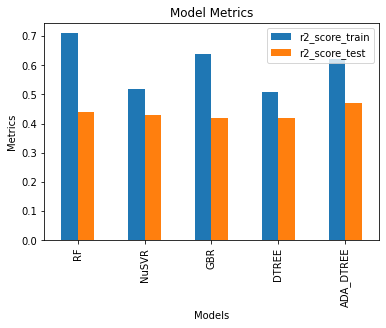

In [52]:
Metric=Metric[['r2_score_train','r2_score_test']]

Metric.to_excel("ML1_int_testing_metric_results.xlsx")


ax=Metric.plot.bar(title='Model Metrics')

ax.set_xlabel("Models")
ax.set_ylabel("Metrics")
plt.savefig('ML1_int_testing_metric_results.png')

**External Testing**

In [53]:
# dataset = pd.read_csv('1_Cleaned_Training_Dataset_LUMO_smiles_descriptors_25Jun21.csv')  

dataset = pd.read_excel('Dataset_Ext_Testing.xlsx')  
test_dataset = dataset.copy()
print('Shape', test_dataset.shape)
print(test_dataset.columns)
test_dataset

Shape (156, 166)
Index(['Unnamed: 0', 'iso', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '194', '196', '205', '213', '216', '226', '237', '242', '243', '245'],
      dtype='object', length=166)


,Unnamed: 0,iso,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,126,127,128,129,130,132,133,135,136,137,139,143,144,149,151,154,156,157,159,160,164,165,167,170,175,176,177,179,181,182,183,184,187,194,196,205,213,216,226,237,242,243,245
0,0,490.77,0.05,0.34,0.83,0.36,0.03,0.85,0.47,0.05,0.63,0.50,0.38,0.14,0.30,0.62,0.09,0.04,0.54,0.58,0.01,0.46,0.34,0.70,0.07,0.38,0.22,0.03,0.71,0.22,0.47,0.01,0.40,0.28,0.98,0.93,0.27,0.68,0.11,0.74,0.54,0.59,0.98,0.75,0.21,0.11,0.81,0.60,0.07,0.90,0.10,0.33,0.81,0.58,0.47,0.65,0.16,0.64,0.58,0.49,0.07,0.78,0.87,0.45,0.72,0.84,0.88,0.18,0.90,0.61,0.55,0.84,0.55,0.35,0.33,0.47,0.06,0.02,0.79,0.28,0.99,0.72,0.06,0.74,0.76,0.74,0.51,0.14,0.58,0.96,0.44,0.76,0.73,0.33,0.48,0.97,0.10,0.98,0.73,0.41,0.02,0.51,0.95,0.49,0.18,0.71,0.42,0.75,0.50,0.17,0.96,0.08,0.05,0.00,0.14,0.00,0.00,0.03,0.02,0.00,0.06,0.00,0.00,0.05,0.00,0.00,0.08,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.07,0.09,0.06,0.00,0.02,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,485.17,0.00,0.39,0.85,0.34,0.05,0.85,0.50,0.07,0.57,0.52,0.40,0.10,0.29,0.59,0.12,0.03,0.53,0.61,0.01,0.46,0.35,0.70,0.05,0.37,0.22,0.01,0.67,0.16,0.40,0.96,0.48,0.35,0.02,0.01,0.28,0.73,0.12,0.72,0.53,0.57,0.99,0.75,0.15,0.10,0.81,0.58,0.09,0.95,0.17,0.35,0.83,0.61,0.49,0.65,0.19,0.62,0.56,0.49,0.09,0.82,0.89,0.46,0.73,0.87,0.86,0.15,0.87,0.59,0.51,0.82,0.51,0.34,0.29,0.42,0.89,0.03,0.79,0.28,0.98,0.73,0.07,0.72,0.76,0.74,0.51,0.12,0.61,0.96,0.45,0.76,0.74,0.32,0.47,0.99,0.10,0.99,0.72,0.43,0.03,0.51,0.98,0.50,0.19,0.70,0.43,0.75,0.50,0.15,0.96,0.08,0.05,0.00,0.14,0.00,0.00,0.03,0.02,0.00,0.06,0.00,0.00,0.05,0.00,0.00,0.08,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.07,0.09,0.06,0.00,0.02,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,489.18,0.02,0.37,0.85,0.37,0.03,0.84,0.48,0.08,0.60,0.53,0.38,0.11,0.30,0.60,0.09,0.04,0.52,0.62,0.01,0.46,0.36,0.70,0.06,0.37,0.22,0.02,0.70,0.16,0.41,0.98,0.41,0.26,0.98,0.01,0.28,0.69,0.11,0.70,0.63,0.66,0.00,0.77,0.17,0.11,0.79,0.59,0.07,0.97,0.17,0.33,0.83,0.58,0.47,0.63,0.20,0.63,0.58,0.50,0.04,0.82,0.89,0.47,0.71,0.85,0.90,0.17,0.89,0.61,0.49,0.82,0.54,0.33,0.31,0.42,0.90,0.03,0.80,0.26,0.98,0.72,0.07,0.72,0.75,0.75,0.52,0.11,0.61,0.97,0.45,0.76,0.74,0.33,0.47,0.97,0.09,0.99,0.74,0.41,0.04,0.51,0.96,0.48,0.19,0.71,0.43,0.73,0.52,0.14,0.96,0.08,0.05,0.00,0.14,0.00,0.00,0.03,0.02,0.00,0.06,0.00,0.00,0.05,0.00,0.00,0.08,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.07,0.09,0.06,0.00,0.02,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,488.46,0.03,0.35,0.85,0.36,0.02,0.85,0.48,0.07,0.60,0.52,0.38,0.12,0.30,0.61,0.08,0.04,0.53,0.60,0.01,0.47,0.36,0.70,0.06,0.36,0.22,0.02,0.71,0.21,0.47,0.01,0.41,0.27,0.99,0.95,0.28,0.68,0.12,0.72,0.62,0.66,0.00,0.78,0.18,0.10,0.78,0.60,0.07,0.94,0.15,0.34,0.82,0.59,0.48,0.65,0.20,0.64,0.59,0.49,0.05,0.80,0.89,0.45,0.69,0.85,0.89,0.18,0.89,0.60,0.52,0.82,0.54,0.35,0.30,0.42,0.91,0.01,0.80,0.27,0.98,0.72,0.08,0.72,0.75,0.76,0.52,0.12,0.60,0.97,0.46,0.75,0.74,0.32,0.47,0.98,0.10,0.99,0.74,0.41,0.03,0.51,0.95,0.48,0.19,0.70,0.43,0.73,0.52,0.15,0.96,0.08,0.05,0.00,0.14,0.00,0.00,0.03,0.02,0.00,0.06,0.00,0.00,0.05,0.00,0.00,0.08,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.07,0.09,0.06,0.00,0.02,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,482.65,0.04,0.33,0.84,0.36,0.04,0.83,0.50,0.03,0.63,0.51,0.39,0.12,0.30,0.62,0.10,0.02,0.56,0.59,0.01,0.47,0

In [55]:
pearson_feature_columns=Relevant_Features_Pearson.columns
pearson_feature_columns

Index(['iso', '3', '30', '31', '34', '35', '42', '54', '66', '68', '81', '87',
       '92', '100', '105', '108', '112', '115', '118', '132', '157', '160',
       '170', '213', '237'],
      dtype='object')

In [56]:
features_columns = pearson_feature_columns
# features_columns = sfs_feature_column
print("Feature Columns :",features_columns)

Feature Columns : Index(['iso', '3', '30', '31', '34', '35', '42', '54', '66', '68', '81', '87',
       '92', '100', '105', '108', '112', '115', '118', '132', '157', '160',
       '170', '213', '237'],
      dtype='object')


**Testing dataset features and target**

In [58]:
target_test = test_dataset.iso
target_test

0     490.77
1     485.17
2     489.18
3     488.46
4     482.65
       ...  
151   495.68
152   492.18
153   500.67
154   493.97
155   495.38
Name: iso, Length: 156, dtype: float64

In [59]:
test_Features = test_dataset.reindex(columns=features_columns)

# taking the columns of Features
test_Features =test_dataset.loc[:,features_columns]
test_Features = test_Features.drop(['iso'], axis = 1)
print("test_Features Shape :",test_Features.shape )
test_Features 




test_Features Shape : (156, 24)


,3,30,31,34,35,42,54,66,68,81,87,92,100,105,108,112,115,118,132,157,160,170,213,237
0,0.36,0.40,0.28,0.27,0.68,0.75,0.47,0.88,0.90,0.72,0.14,0.73,0.02,0.71,0.50,0.05,0.00,0.02,0.00,0.06,0.02,0.00,0.00,0.00
1,0.34,0.48,0.35,0.28,0.73,0.75,0.49,0.86,0.87,0.73,0.12,0.74,0.03,0.70,0.50,0.05,0.00,0.02,0.00,0.06,0.02,0.00,0.00,0.00
2,0.37,0.41,0.26,0.28,0.69,0.77,0.47,0.90,0.89,0.72,0.11,0.74,0.04,0.71,0.52,0.05,0.00,0.02,0.00,0.06,0.02,0.00,0.00,0.00
3,0.36,0.41,0.27,0.28,0.68,0.78,0.48,0.89,0.89,0.72,0.12,0.74,0.03,0.70,0.52,0.05,0.00,0.02,0.00,0.06,0.02,0.00,0.00,0.00
4,0.36,0.41,0.28,0.26,0.65,0.77,0.48,0.89,0.90,0.73,0.12,0.74,0.89,0.71,0.51,0.05,0.00,0.02,0.00,0.06,0.02,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.93,0.98,0.90,0.62,0.05,0.83,0.46,0.18,0.34,0.93,0.71,0.20,0.39,0.90,0.93,0.82,0.53,0.60,0.07,0.27,0.36,0.61,1.00,0.00
152,0.84,0.98,0.90,0.62,0.05,0.83,0.47,0.20,0.32,0.93,0.70,0.21,0.36,0.90,0.95,0.82,0.55,0.60,0.99,0.29,0.31,0.62,0.07,0.00
153,0.84,0.98,0.90,0.63,0.08,0.85,0.48,0.19,0.35,0.93,0.72,0.20,0.39,0.89,0.96,0.86,0.52,0.62,0.06,0.27,0.33,0.61,1.00,0.00
154,0.91,0.98,0.91,0.60,0.06,0.82,0.48,0.17,0.34,0.92,0.74,0.19,0.40,0.90,1.00,0.82,0.51,0.60,0.06,0.31,0.36,0.60,1.00,0.00


In [63]:
def EXT_test_models(x_test,model):
    
    predictions_test = model.predict(x_test)
    test = pd.DataFrame(np.array(predictions_test), columns=[model])
    df_test.append(test)
    final_test = pd.concat(df_test, ignore_index=False, axis=1)   
    final_test.to_csv("final_EXT_testing.csv")
    
    return data
    

for model in models:
     EXT_test_models(test_Features, model)
    
    


#### **External Testing result**

In [77]:
print("Testing \n")
df_test = pd.read_csv("final_EXT_testing.csv")
df_test.columns = [model_name]


Final_Testing_result = pd.concat([target_test.reset_index(), df_test], axis = 1)
df_Ext_testing = Final_Testing_result[Final_Testing_result.columns.drop((Final_Testing_result.filter(regex='dex')))]

df_Ext_testing= df_Ext_testing.round(2)
df_Ext_testing
df_Ext_testing.to_excel("ML1_Ext_testing_results.xlsx")
df_Ext_testing


Testing 



,iso,"(RF,)","(NuSVR,)","(GBR,)","(DTREE,)","(ADA_DTREE,)"
0,490.77,489.22,489.80,488.92,489.72,489.43
1,485.17,489.08,489.59,488.63,489.72,489.58
2,489.18,489.47,489.75,488.92,489.72,489.43
3,488.46,488.87,489.75,488.92,489.72,489.43
4,482.65,488.30,488.66,487.80,489.72,488.96
...,...,...,...,...,...,...
151,495.68,493.47,493.93,493.61,494.13,494.23
152,492.18,493.75,494.22,493.91,494.13,494.39
153,500.67,493.12,494.09,493.13,494.13,494.30
154,493.97,493.40,493.79,493.61,494.13,494.09


In [74]:
Final_Metric_result=pd.DataFrame.from_dict(df_metric)
Final_Metric_result.index = [model_name_metric]

Metric = Final_Metric_result

Metric=Metric.sort_values('r2_score_test',ascending=False)
Metric= Metric[Metric['r2_score_test'] >= 0]
Metric=Metric.round(2)

# Metric.to_csv("small_dataset_without_smogn.csv")
Metric

,MAE,MSE,RMSE,r2_score_train,r2_score_test
ADA_DTREE,2.67,11.22,3.35,0.62,0.47
RF,2.77,11.84,3.44,0.71,0.44
NuSVR,2.73,11.86,3.44,0.52,0.43
GBR,2.82,12.11,3.48,0.64,0.42
DTREE,2.77,12.22,3.50,0.51,0.42


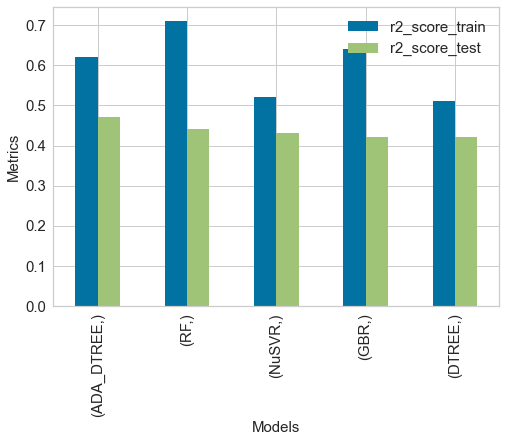

In [155]:
Metric=Metric[['r2_score_train','r2_score_test']]

Metric.to_excel("ML1_Ext_testing_metric_results.xlsx")


ax=Metric.plot.bar()

ax.set_xlabel("Models")
ax.set_ylabel("Metrics")
plt.savefig('ML1_Ext_testing_metric_results.png')

## Modelling using Machine Learning - Method-2

In [ ]:
## Using pycaret

In [78]:
dataset1 = pd.read_csv('Main_dataset.csv', index_col=0)  
df_Original = dataset1.copy()
print("Shape :", df_Original.shape)
print("\n")

df_Original.head(4)

Shape : (1557, 165)




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,126,127,128,129,130,132,133,135,136,137,139,143,144,149,151,154,156,157,159,160,164,165,167,170,175,176,177,179,181,182,183,184,187,194,196,205,213,216,226,237,242,243,245,iso
0,-0.73,5.11,7.80,4.64,0.10,7.92,6.78,1.00,5.44,7.49,5.09,0.91,4.19,8.12,0.79,0.10,7.17,5.52,-0.64,5.91,3.21,5.74,0.18,3.31,2.59,-0.31,6.28,1.71,5.37,8.95,5.76,3.22,0.01,-0.78,2.84,6.42,0.13,6.58,4.15,4.74,9.14,6.84,1.12,1.14,7.29,5.44,0.25,6.94,1.02,4.30,8.08,5.43,6.68,7.43,1.72,6.70,7.46,4.68,0.21,7.49,8.14,3.25,6.78,7.39,7.14,1.19,8.12,6.04,3.89,7.45,6.35,2.45,2.88,5.49,8.65,1.71,5.52,3.84,9.00,7.81,1.35,6.64,7.89,6.43,4.70,0.19,5.97,8.83,3.36,8.25,6.72,3.14,6.06,8.87,0.44,8.25,6.68,6.30,-0.39,4.71,7.89,6.39,1.70,7.45,4.23,6.78,5.68,0.92,8.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,486.45
1,-0.32,4.82,7.75,4.90,-0.06,7.90,6.71,0.83,5.49,7.24,5.14,0.96,4.18,8.30,0.84,0.09,7.16,5.40,-0.61,5.98,3.23,5.62,0.22,3.28,2.63,-0.39,6.43,2.45,6.36,0.12,4.82,2.37,8.78,-0.82,2.79,6.30,0.16,6.41,4.94,5.82,0.06,6.85,1.37,1.11,7.23,5.46,0.06,7.04,0.84,4.07,7.88,5.36,6.90,7.78,1.80,6.57,7.48,4.57,0.12,7.37,7.99,3.17,6.56,7.50,7.35,1.17,8.21,6.08,4.11,7.42,6.87,2.36,3.14,5.58,8.86,1.71,5.36,3.97,8.87,7.86,1.24,6.66,7.80,6.48,4.64,0.20,5.94,8.80,3.41,8.02,6.83,3.06,6.12,9.09,0.45,8.18,6.66,5.38,8.57,4.66,7.86,6.48,1.76,7.53,4.24,6.75,5.75,1.02,8.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,488.82
2,-0.47,5.16,7.43,5.04,-0.07,7.81,6.63,0.94,5.64,7.15,5.14,1.07,4.09,8.11,0.87,0.24,7.07,5.45,-0.75,6.14,3.13,5.76,0.23,3.41,2.61,-0.20,6.65,1.62,5.31,9.03,4.91,2.37,8.95,-0.72,2.81,6.41,0.23,6.40,4.01,4.76,9.00,6.71,1.38,1.20,7.41,5.19,0.03,6.81,0.79,4.18,8.02,5.43,6.67,7.66,1.66,6.60,7.39,4.78,0.21,7.40,8.10,3.26,6.60,7.35,7.25,1.13,8.16,6.12,4.15,7.43,6.60,2.49,3.37,5.43,8.86,1.76,5.38,3.93,8.94,7.89,1.31,6.69,7.92,6.41,4.69,0.19,5.94,8.69,3.39,8.13,6.84,3.08,6.05,8.95,0.48,8.17,6.67,6.20,-0.43,4.81,7.70,6.49,1.67,7.53,4.22,6.66,5.79,1.00,8.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,493.75
3,-0.71,5.05,7.82,4.72,0.19,7.78,6.96,0.93,5.38,7.57,5.02,0.85,4.15,7.98,0.90,-0.07,7.02,5.62,8.15,5.89,3.29,5.91,0.25,3.18,2.49,-0.31,6.37,1.65,5.25,9.04,5.89,3.23,0.20,-0.76,2.95,6.19,0.10,6.76,4.26,4.87,9.18,7.02,1.00,0.88,6.95,5.41,0.42,6.92,1.19,4.28,8.16,5.49,6.74,7.39,1.60,6.60,7.54,4.48,0.26,7.40,8.15,3.27,6.68,7.50,7.05,1.56,8.03,5.97,3.95,7.44,6.78,2.40,2.85,5.59,8.64,1.59,5.50,3.86,9.01,7.81,1.45,6.67,7.70,6.43,4.70,0.18,5.94,8.87,3.35,8.16,6.83,3.10,5.96,8.97,0.32,8.20,6.72,6.22,-0.31,4.62,7.95,6.37,1.71,7.37,4.26,6.72,5.72,0.99,8.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,489.57


In [79]:
data = df_Original.sample(frac=0.9, random_state=786)
data_unseen = df_Original.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1401, 165)
Unseen Data For Predictions: (156, 165)


In [80]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,126,127,128,129,130,132,133,135,136,137,139,143,144,149,151,154,156,157,159,160,164,165,167,170,175,176,177,179,181,182,183,184,187,194,196,205,213,216,226,237,242,243,245,iso
0,0.95,2.42,7.79,5.22,1.53,3.11,4.08,3.24,4.74,2.79,4.40,3.64,1.97,0.35,2.34,3.50,0.25,2.67,4.06,4.34,5.73,1.56,4.79,2.69,5.70,2.96,2.77,2.05,1.38,7.53,-0.69,4.51,7.70,4.83,-0.34,7.63,6.70,5.44,7.26,4.66,0.82,3.95,7.59,0.75,0.18,5.39,-0.63,5.60,3.01,5.47,-0.26,3.19,1.91,8.19,6.37,1.50,4.87,8.81,5.02,1.79,8.98,8.12,2.43,6.21,0.09,-0.09,6.18,3.94,4.11,9.18,7.00,0.46,0.84,7.12,4.74,5.27,0.09,6.70,0.81,4.26,7.46,5.37,6.48,6.98,1.73,6.73,7.21,4.36,0.18,7.06,7.87,3.42,6.11,7.35,7.20,0.81,7.97,5.92,3.72,7.35,3.43,3.79,5.20,2.52,4.57,2.65,2.77,0.84,2.45,4.89,2.47,3.05,1.73,1.99,8.24,3.35,3.02,1.30,5.32,1.60,5.34,7.79,0.90,6.46,7.79,5.99,0.05,5.58,3.41,7.64,6.76,5.47,6.39,5.43,1.56,3.86,0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,489.38
1,3.57,2.20,7.27,2.64,5.75,3.24,1.70,0.87,2.76,2.44,3.89,0.60,-0.09,8.67,1.16,8.57,0.73,1.43,3.15,0.34,3.31,1.64,2.63,0.83,3.45,5.97,4.54,3.05,1.08,6.49,-0.57,4.64,7.59,4.86,-0.34,7.75,6.85,5.48,7.52,4.87,0.59,4.19,7.51,0.86,0.25,5.37,-0.63,5.54,3.06,4.71,8.68,3.38,2.11,8.28,6.26,1.62,4.89,8.88,5.00,1.96,8.91,-0.69,2.43,6.21,0.34,0.02,6.50,4.08,4.18,8.91,6.66,0.74,1.08,7.33,4.71,5.26,0.32,6.74,0.94,4.54,7.32,5.55,6.90,7.30,1.84,6.82,7.17,4.51,0.32,7.20,8.02,3.43,6.12,7.41,7.24,0.72,8.04,6.06,3.64,7.26,2.34,0.91,3.52,2.16,3.30,1.27,0.59,0.50,1.54,3.33,5.31,3.78,2.95,2.07,6.52,3.09,2.94,4.03,5.44,1.79,5.52,7.92,0.89,6.60,7.95,6.02,0.16,5.65,3.62,7.60,6.81,5.46,6.48,5.52,1.58,3.83,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,495.94
2,6.33,2.62,3.71,3.52,2.39,0.66,2.72,6.18,2.01,0.96,2.25,4.98,-0.38,2.84,1.79,8.32,1.34,1.73,3.08,6.35,3.40,0.91,2.46,3.46,2.16,1.78,1.01,5.33,1.63,3.07,-0.49,4.43,7.76,4.89,-0.49,7.74,6.87,5.50,7.25,4.58,1.06,4.24,7.54,0.81,0.10,5.62,-0.65,5.46,3.32,5.12,8.71,3.19,1.92,7.94,6.69,1.70,5.07,8.87,4.89,1.79,9.03,-0.77,2.37,6.30,0.33,0.01,6.55,4.88,5.15,0.08,6.91,0.55,0.91,7.14,4.47,5.41,0.35,6.19,1.10,4.14,7.67,5.33,7.01,7.17,1.83,6.56,6.98,4.80,-0.18,6.99,8.23,3.56,6.00,7.37,7.23,0.78,8.05,6.04,3.72,7.65,2.76,5.65,2.81,1.55,2.55,4.24,0.06,2.00,2.06,2.91,2.24,1.37,5.43,2.54,3.34,3.24,3.49,3.28,5.61,1.61,5.41,7.95,0.82,6.53,7.78,5.85,0.14,5.49,3.50,7.55,6.80,5.51,6.80,5.49,1.81,3.72,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,487.37
3,-0.61,5.09,7.80,4.75,0.14,7.87,6.75,1.03,5.44,7.24,5.04,0.97,4.17,8.14,0.74,0.07,7.06,5.54,-0.73,5.92,3.28,5.68,0.25,3.25,2.67,-0.32,6.41,1.62,5.37,9.09,5.84,3.13,0.07,-0.72,2.89,6.43,0.01,6.56,4.04,4.69,9.02,6.97,1.09,1.01,7.13,5.55,0.17,7.01,1.03,4.48,7.85,5.53,6.66,7.48,1.77,6.81,7.71,4.53,0.37,7.49,8.12,3.22,6.71,7.45,7.18,1.27,8.09,6.09,3.91,7.54,6.38,2.48,2.74,5.49,8.73,1.61,5.39,3.80,8.97,7.83,1.36,6.60,7.82,6.48,4.74,0.15,6.05,8.86,3.50,8.13,6.77,3.10,6.02,8.87,0.46,8.21,6.64,6.25,-0.35,4.67,7.81,6.42,1.75,7.49,4.24,6.80,5.84,0.87,8.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,487.52
4,6.32,2.69,2.91,2.18,1.66,1.68,3.41,6.44,2.62,2.31,2.56,6.35,8.17,3.10,1.66,7.99,1.63,1.83,2.10,5.76,2.71,3.7

<AxesSubplot:xlabel='iso', ylabel='Density'>

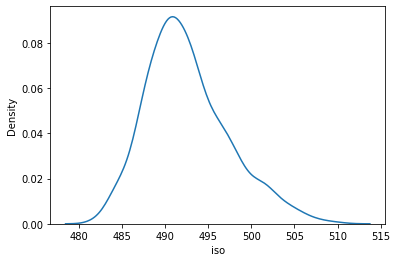

In [81]:
import seaborn
seaborn.kdeplot(data["iso"])
    

In [ ]:
# data= SMOGN(data, 'ox', 9, 'balance', 0.8, 'auto','both', 2)
# data

In [82]:
data_unseen

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,126,127,128,129,130,132,133,135,136,137,139,143,144,149,151,154,156,157,159,160,164,165,167,170,175,176,177,179,181,182,183,184,187,194,196,205,213,216,226,237,242,243,245,iso
0,-0.08,4.64,7.61,4.79,0.08,7.75,6.58,0.69,5.77,7.08,4.89,1.24,4.19,8.23,0.85,0.08,7.28,5.36,-0.60,5.92,3.16,5.87,0.40,3.32,2.59,-0.29,6.51,2.63,6.34,0.07,4.71,2.45,8.97,7.92,2.75,6.22,0.10,6.79,4.24,5.00,9.04,6.67,1.41,1.05,7.39,5.49,0.10,6.66,0.74,4.17,7.84,5.34,6.68,7.56,1.51,6.69,7.54,4.50,0.30,7.22,8.03,3.20,6.70,7.34,7.07,1.42,8.24,6.24,4.32,7.74,6.85,2.60,2.99,6.24,-0.16,1.67,5.41,3.91,9.04,7.70,1.27,6.76,7.89,6.40,4.65,0.31,5.80,8.74,3.36,8.14,6.72,3.20,6.19,8.92,0.44,8.14,6.70,6.13,-0.44,4.69,7.78,6.44,1.67,7.55,4.20,6.85,5.55,1.06,8.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,490.77
1,-0.86,5.34,7.77,4.45,0.30,7.82,7.06,0.93,5.28,7.42,5.18,0.95,3.99,7.89,1.09,-0.09,7.05,5.64,-0.59,5.90,3.24,5.79,0.16,3.22,2.64,-0.52,6.19,1.61,5.30,8.81,5.96,3.23,0.23,-0.72,2.89,6.68,0.23,6.64,4.15,4.80,9.11,6.69,0.89,0.87,7.36,5.32,0.36,7.01,1.08,4.45,8.08,5.59,6.90,7.60,1.74,6.48,7.29,4.53,0.47,7.59,8.19,3.30,6.83,7.61,6.95,1.09,7.90,6.01,3.94,7.53,6.29,2.45,2.64,5.50,8.53,1.67,5.41,3.89,9.03,7.88,1.33,6.64,7.86,6.37,4.71,0.19,6.12,8.75,3.38,8.14,6.77,3.09,6.04,9.01,0.44,8.23,6.64,6.33,-0.35,4.66,8.02,6.53,1.78,7.45,4.27,6.84,5.59,0.88,8.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,485.17
2,-0.53,5.12,7.79,4.95,0.04,7.68,6.68,1.02,5.49,7.45,4.89,1.02,4.16,8.05,0.82,0.02,6.98,5.69,-0.66,5.95,3.30,5.82,0.34,3.25,2.60,-0.41,6.44,1.59,5.52,9.00,4.90,2.23,9.03,-0.71,2.95,6.30,0.11,6.44,5.05,5.69,0.01,6.86,1.02,1.00,7.09,5.44,0.15,7.19,1.09,4.16,8.12,5.30,6.60,7.30,1.85,6.60,7.58,4.57,0.09,7.61,8.21,3.41,6.62,7.38,7.27,1.24,8.14,6.16,3.75,7.52,6.71,2.41,2.85,5.52,8.65,1.71,5.48,3.76,9.01,7.80,1.41,6.61,7.74,6.48,4.75,0.11,6.11,8.87,3.42,8.12,6.77,3.16,6.00,8.93,0.35,8.23,6.74,6.12,-0.28,4.65,7.86,6.36,1.76,7.54,4.32,6.72,5.77,0.86,8.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,489.18
3,-0.38,4.82,7.80,4.89,-0.00,7.80,6.69,0.92,5.50,7.28,4.93,1.12,4.16,8.18,0.69,0.13,7.09,5.52,-0.67,5.99,3.32,5.78,0.31,3.19,2.66,-0.39,6.54,2.45,6.25,0.08,4.88,2.31,9.05,8.12,2.90,6.20,0.22,6.62,5.02,5.77,0.03,7.01,1.11,0.96,7.05,5.49,0.11,6.91,1.02,4.28,7.97,5.39,6.75,7.56,1.81,6.76,7.70,4.53,0.20,7.46,8.19,3.20,6.47,7.38,7.17,1.35,8.10,6.06,4.04,7.49,6.64,2.52,2.70,5.52,8.72,1.57,5.43,3.86,9.00,7.81,1.42,6.60,7.82,6.51,4.75,0.15,5.93,8.85,3.47,8.00,6.79,3.08,6.00,8.95,0.43,8.22,6.74,6.15,-0.38,4.64,7.77,6.37,1.78,7.44,4.32,6.73,5.74,0.93,8.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,488.46
4,-0.32,4.58,7.74,4.80,0.21,7.65,6.96,0.32,5.79,7.26,4.96,1.11,4.21,8.32,0.91,-0.25,7.47,5.46,-0.60,6.08,3.22,

In [83]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'iso', session_id=123,  remove_outliers = True, normalize=True, normalize_method ='zscore',remove_multicollinearity = True, multicollinearity_threshold = 0.6, feature_selection = True) 

,Description,Value
0,session_id,123
1,Target,iso
2,Original Data,"(1401, 165)"
3,Missing Values,False
4,Numeric Features,164
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(931, 38)"


In [84]:
best = compare_models(include = ['dummy','dt','rf','et','gbr','mlp','lightgbm','ada'])



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.7790,12.4914,3.5264,0.4128,0.0071,0.0056,0.2800
et,Extra Trees Regressor,2.7910,12.4975,3.5272,0.4126,0.0071,0.0057,0.1530
gbr,Gradient Boosting Regressor,2.8135,12.7714,3.5656,0.3992,0.0072,0.0057,0.0970
ada,AdaBoost Regressor,2.8282,12.8675,3.5835,0.3911,0.0073,0.0057,0.0400
lightgbm,Light Gradient Boosting Machine,2.9163,13.7026,3.6954,0.3520,0.0075,0.0059,0.2160
dummy,Dummy Regressor,3.6617,21.8038,4.6548,-0.0184,0.0094,0.0074,0.3940
dt,Decision Tree Regressor,3.6894,22.3262,4.7161,-0.0652,0.0095,0.0075,0.1800
mlp,MLP Regressor,36.4711,2800.9171,52.5229,-133.3804,0.1173,0.0741,0.4030


### Tune best model

In [85]:
rf = create_model('rf')
gbr = create_model('gbr')
et = create_model('et')
ada = create_model('ada')
mlp = create_model('mlp')
dt = create_model('dt')
lightgbm = create_model('lightgbm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.0693,15.4461,3.9302,0.4004,0.0079,0.0062
1,2.7276,12.6165,3.5520,0.2850,0.0072,0.0056
2,2.8156,13.2725,3.6431,0.3480,0.0074,0.0057
3,3.2155,16.4207,4.0523,0.3298,0.0082,0.0065
4,3.1720,14.4339,3.7992,0.3094,0.0077,0.0064
5,3.1353,15.0652,3.8814,0.4521,0.0078,0.0064
6,2.9428,13.2047,3.6338,0.2838,0.0074,0.0060
7,2.8316,12.0300,3.4684,0.2792,0.0070,0.0057
8,2.4682,10.8838,3.2991,0.5037,0.0067,0.0050
9,2.7850,13.6527,3.6950,0.3287,0.0075,0.0057


In [86]:
# tuned_et = tune_model(et,n_iter = 50)

tuned_rf = tune_model(rf)
tuned_gbr = tune_model(gbr)
tuned_et = tune_model(et)
tuned_ada = tune_model(ada)
tuned_mlp = tune_model(mlp)
tuned_dt = tune_model(dt)
tuned_lightgbm = tune_model(lightgbm)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.0286,14.1627,3.7633,0.4502,0.0076,0.0061
1,2.6569,11.7806,3.4323,0.3324,0.0070,0.0054
2,2.8312,13.0823,3.6169,0.3573,0.0073,0.0058
3,3.1807,15.7956,3.9744,0.3553,0.0080,0.0065
4,2.9796,13.0015,3.6058,0.3779,0.0073,0.0060
5,3.1144,14.2415,3.7738,0.4821,0.0076,0.0063
6,2.7674,11.4161,3.3788,0.3809,0.0068,0.0056
7,2.5775,10.0506,3.1703,0.3978,0.0064,0.0052
8,2.4216,10.4581,3.2339,0.5231,0.0065,0.0049
9,2.6632,11.4399,3.3823,0.4375,0.0069,0.0054


In [87]:
models= [tuned_rf,tuned_gbr,tuned_et,tuned_ada,tuned_mlp,tuned_dt,tuned_lightgbm]
model_name_metric= ['rf','gbr','et','ada','mlp','dt','lightgbm']

df_metric_Int = []




for model in models:
    
    from pycaret.utils import check_metric
    unseen_predictions = predict_model(model, data=data_unseen)
    r2=check_metric(unseen_predictions.iso, unseen_predictions.Label, 'R2')
    
    data = {'r2_Int_test':r2 } 
    df_metric_Int.append(data)

    

In [88]:
df_metric_Int

dfm_Int=pd.DataFrame.from_dict(df_metric_Int)
dfm_Int.index = [model_name_metric]

dfm_Int

,r2_Int_test
rf,0.55
gbr,0.51
et,0.56
ada,0.56
mlp,0.51
dt,0.47
lightgbm,0.57


In [89]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,11
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0002
min_impurity_split,None
min_samples_leaf,5


### Prediction on unseen data

In [90]:
unseen_predictions = predict_model(tuned_rf, data=data_unseen)
unseen_predictions

,0,1,2,3,4,5,6,7,8,9,...,205,213,216,226,237,242,243,245,iso,Label
0,-0.08,4.64,7.61,4.79,0.08,7.75,6.58,0.69,5.77,7.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,490.77,489.72
1,-0.86,5.34,7.77,4.45,0.30,7.82,7.06,0.93,5.28,7.42,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,485.17,489.67
2,-0.53,5.12,7.79,4.95,0.04,7.68,6.68,1.02,5.49,7.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,489.18,489.48
3,-0.38,4.82,7.80,4.89,-0.00,7.80,6.69,0.92,5.50,7.28,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,488.46,490.40
4,-0.32,4.58,7.74,4.80,0.21,7.65,6.96,0.32,5.79,7.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,482.65,489.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.27,1.11,2.46,13.88,2.65,2.81,7.39,10.32,6.91,6.03,...,8.51,14.65,6.88,6.42,0.00,0.00,0.00,0.00,495.68,493.05
152,13.43,12.69,2.21,12.53,13.14,3.35,7.51,10.13,7.20,5.85,...,8.62,1.03,6.88,6.62,0.00,0.00,0.00,0.00,492.18,493.90
153,13.59,12.40,1.59,12.52,12.81,0.58,7.15,10.07,6.86,5.96,...,8.65,14.65,6.84,6.50,0.00,0.00,0.00,0.00,500.67,492.94
154,13.86,1.50,2.48,13.56,2.97,2.37,7.23,9.97,6.74,5.96,...,8.52,14.67,6.71,6.37,0.00,0.00,0.00,0.00,493.97,492.95


In [91]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.iso, unseen_predictions.Label, 'R2')

0.5454

In [92]:
unseen_predictions["percent"] = ((unseen_predictions['iso']-unseen_predictions['Label']) / (unseen_predictions['iso'])) * 100
unseen_predictions

,0,1,2,3,4,5,6,7,8,9,...,213,216,226,237,242,243,245,iso,Label,percent
0,-0.08,4.64,7.61,4.79,0.08,7.75,6.58,0.69,5.77,7.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,490.77,489.72,0.21
1,-0.86,5.34,7.77,4.45,0.30,7.82,7.06,0.93,5.28,7.42,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,485.17,489.67,-0.93
2,-0.53,5.12,7.79,4.95,0.04,7.68,6.68,1.02,5.49,7.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,489.18,489.48,-0.06
3,-0.38,4.82,7.80,4.89,-0.00,7.80,6.69,0.92,5.50,7.28,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,488.46,490.40,-0.40
4,-0.32,4.58,7.74,4.80,0.21,7.65,6.96,0.32,5.79,7.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,482.65,489.80,-1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.27,1.11,2.46,13.88,2.65,2.81,7.39,10.32,6.91,6.03,...,14.65,6.88,6.42,0.00,0.00,0.00,0.00,495.68,493.05,0.53
152,13.43,12.69,2.21,12.53,13.14,3.35,7.51,10.13,7.20,5.85,...,1.03,6.88,6.62,0.00,0.00,0.00,0.00,492.18,493.90,-0.35
153,13.59,12.40,1.59,12.52,12.81,0.58,7.15,10.07,6.86,5.96,...,14.65,6.84,6.50,0.00,0.00,0.00,0.00,500.67,492.94,1.54
154,13.86,1.50,2.48,13.56,2.97,2.37,7.23,9.97,6.74,5.96,...,14.67,6.71,6.37,0.00,0.00,0.00,0.00,493.97,492.95,0.21


In [93]:
unseen_predictions['percent'] = ((unseen_predictions.iso - unseen_predictions.Label) / (unseen_predictions.iso))*100 
unseen_predictions.head(20)

,0,1,2,3,4,5,6,7,8,9,...,213,216,226,237,242,243,245,iso,Label,percent
0,-0.08,4.64,7.61,4.79,0.08,7.75,6.58,0.69,5.77,7.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,490.77,489.72,0.21
1,-0.86,5.34,7.77,4.45,0.30,7.82,7.06,0.93,5.28,7.42,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,485.17,489.67,-0.93
2,-0.53,5.12,7.79,4.95,0.04,7.68,6.68,1.02,5.49,7.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,489.18,489.48,-0.06
3,-0.38,4.82,7.80,4.89,-0.00,7.80,6.69,0.92,5.50,7.28,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,488.46,490.40,-0.40
4,-0.32,4.58,7.74,4.80,0.21,7.65,6.96,0.32,5.79,7.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,482.65,489.80,-1.48
5,-0.61,5.31,7.57,4.70,0.06,7.90,6.68,0.94,5.61,7.43,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,489.00,489.31,-0.06
6,-0.60,5.00,7.74,4.83,0.07,7.80,6.64,0.94,5.61,7.24,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,489.13,488.72,0.08
7,-0.42,5.27,7.46,4.81,0.03,7.86,6.62,0.79,5.55,7.39,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,483.60,489.01,-1.12
8,-0.77,4.98,7.92,4.92,0.16,7.67,6.78,0.89,5.50,7.43,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,488.98,490.12,-0.23
9,-0.65,5.08,7.92,4.61,0.07,7.86,6.78,0.90,5.41,7.41,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,484.98,489.27,-0.89


In [134]:
unseen_predictions=unseen_predictions.round(2)
unseen_predictions.to_csv("ML2_unseen_prediction.csv")

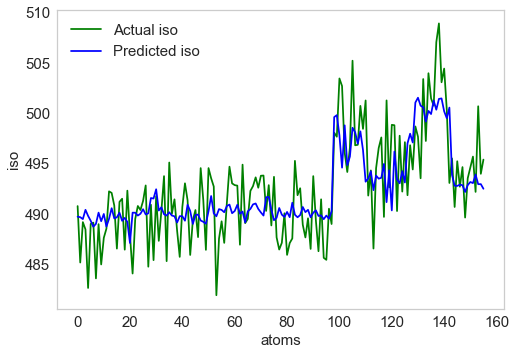

In [144]:
import matplotlib.pyplot as plt


SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

#Visualising the Acutal and predicted Result
plt.plot(unseen_predictions.iso, color = 'green', label = 'Actual iso')
plt.plot(unseen_predictions.Label, color = 'blue', label = 'Predicted iso')
plt.grid(alpha = 0.2)


plt.xlabel('atoms')
plt.ylabel('iso')
# plt.title('Actual vs Predicted')
plt.legend()
plt.show()

## Modelling using Deep learning

In [ ]:
#calculate the average score of the train dataset
mean_LUMO = y_train.mean()
print("Average LUMO :", mean_LUMO)

#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_LUMO).mean())

In [95]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


#Create Deep Neural Network Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import History


history = History()



model = Sequential()
model.add(Dense(128,input_dim = X_train.shape[1],activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))


model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))

# model.add(Dense(128,activation="relu"))
# model.add(Dropout(0.2))


model.add(Dense(1,activation = "linear"))

#Configure the model
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model.fit(X_train,y_train, validation_data=(X_val, y_val),epochs=200,batch_size=30)
              
#

result = model.evaluate(X_test,y_test)


for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/200
38/38 [==============================] - 1s 8ms/step - loss: 233442.5625 - mean_absolute_error: 483.0267 - val_loss: 205968.7812 - val_mean_absolute_error: 453.7383
Epoch 2/200
38/38 [==============================] - 0s 4ms/step - loss: 100113.4219 - mean_absolute_error: 282.6227 - val_loss: 16767.3027 - val_mean_absolute_error: 92.2786
Epoch 3/200
38/38 [==============================] - 0s 4ms/step - loss: 19047.6035 - mean_absolute_error: 108.9221 - val_loss: 4867.9722 - val_mean_absolute_error: 59.3737
Epoch 4/200
38/38 [==============================] - 0s 4ms/step - loss: 13524.7930 - mean_absolute_error: 95.1332 - val_loss: 1682.1176 - val_mean_absolute_error: 31.5630
Epoch 5/200
38/38 [==============================] - 0s 4ms/step - loss: 11463.5479 - mean_absolute_error: 86.2357 - val_loss: 1304.0171 - val_mean_absolute_error: 27.5657
Epoch 6/200
38/38 [==============================] - 0s 4ms/step - loss: 10329.4189 - mean_absolute_error: 81.5936 - val_loss: 1811

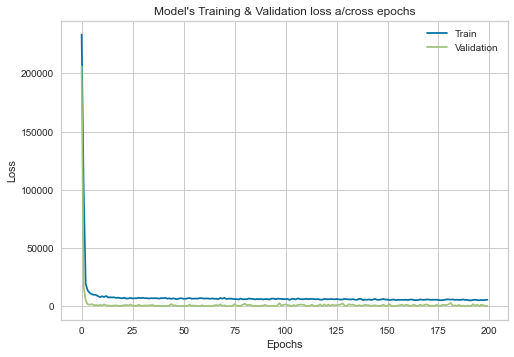

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss a/cross epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [97]:

# Predictions
import itertools

predictions = model.predict(X_test)
# predictions = list(itertools.islice(y, y_test.shape[0]))
predictions=predictions.reshape(X_test.shape[0])
# y_test=y_test.reshape(33)
y_test=y_test


dataset = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
dataset

,Actual,Predicted
1030,487.50,473.87
312,495.53,489.24
224,483.36,478.10
1255,496.15,477.11
1232,505.19,493.11
...,...,...
657,490.27,490.39
601,488.47,479.53
458,490.16,483.26
1295,498.96,484.15


r2_score :  -8.809482028450306
mean_squared_error :  205.9687260822525


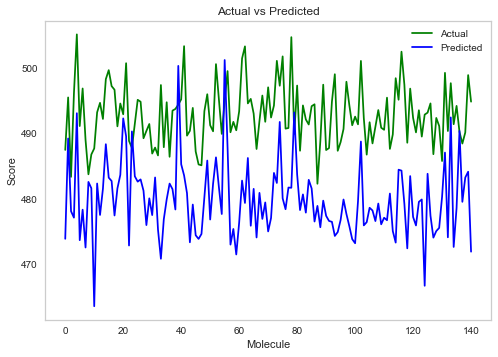

In [98]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


print('r2_score : ', r2_score(y_test, predictions) ) 

print('mean_squared_error : ', mean_squared_error(y_test, predictions) ) 


y_test.reset_index(drop = True, inplace =True)

#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(predictions, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.2)
plt.xlabel('Molecule')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

### External testing

In [99]:
# dataset = pd.read_csv('1_Cleaned_Training_Dataset_LUMO_smiles_descriptors_25Jun21.csv')  
dataset = pd.read_excel('Dataset_Ext_Testing.xlsx')  
test_dataset = dataset.copy()
print('Shape', test_dataset.shape)
print(test_dataset.columns)
test_dataset

Shape (156, 166)
Index(['Unnamed: 0', 'iso', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '194', '196', '205', '213', '216', '226', '237', '242', '243', '245'],
      dtype='object', length=166)


,Unnamed: 0,iso,0,1,2,3,4,5,6,7,...,194,196,205,213,216,226,237,242,243,245
0,0,490.77,0.05,0.34,0.83,0.36,0.03,0.85,0.47,0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,485.17,0.00,0.39,0.85,0.34,0.05,0.85,0.50,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,489.18,0.02,0.37,0.85,0.37,0.03,0.84,0.48,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,488.46,0.03,0.35,0.85,0.36,0.02,0.85,0.48,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,482.65,0.04,0.33,0.84,0.36,0.04,0.83,0.50,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,495.68,0.07,0.08,0.27,0.93,0.22,0.31,0.52,0.76,...,0.96,0.00,0.62,1.00,0.47,0.47,0.00,0.00,0.00,0.00
152,152,492.18,0.89,0.93,0.24,0.84,0.97,0.37,0.53,0.75,...,0.93,1.00,0.63,0.07,0.47,0.49,0.00,0.00,0.00,0.00
153,153,500.67,0.90,0.91,0.17,0.84,0.94,0.06,0.51,0.74,...,0.97,1.00,0.63,1.00,0.47,0.48,0.00,0.00,0.00,0.00
154,154,493.97,0.92,0.11,0.27,0.91,0.24,0.26,0.51,0.74,...,0.95,0.99,0.62,1.00,0.46,0.47,0.00,0.00,0.00,0.00


In [100]:
pearson_feature_columns=Relevant_Features_Pearson.columns


features_columns = pearson_feature_columns
# features_columns = sfs_feature_column
print("Feature Columns :",features_columns)
features_columns

Feature Columns : Index(['iso', '3', '30', '31', '34', '35', '42', '54', '66', '68', '81', '87',
       '92', '100', '105', '108', '112', '115', '118', '132', '157', '160',
       '170', '213', '237'],
      dtype='object')


Index(['iso', '3', '30', '31', '34', '35', '42', '54', '66', '68', '81', '87',
       '92', '100', '105', '108', '112', '115', '118', '132', '157', '160',
       '170', '213', '237'],
      dtype='object')

In [101]:
test_Features = test_dataset.reindex(columns=features_columns)
test_Features

,iso,3,30,31,34,35,42,54,66,68,...,108,112,115,118,132,157,160,170,213,237
0,490.77,0.36,0.40,0.28,0.27,0.68,0.75,0.47,0.88,0.90,...,0.50,0.05,0.00,0.02,0.00,0.06,0.02,0.00,0.00,0.00
1,485.17,0.34,0.48,0.35,0.28,0.73,0.75,0.49,0.86,0.87,...,0.50,0.05,0.00,0.02,0.00,0.06,0.02,0.00,0.00,0.00
2,489.18,0.37,0.41,0.26,0.28,0.69,0.77,0.47,0.90,0.89,...,0.52,0.05,0.00,0.02,0.00,0.06,0.02,0.00,0.00,0.00
3,488.46,0.36,0.41,0.27,0.28,0.68,0.78,0.48,0.89,0.89,...,0.52,0.05,0.00,0.02,0.00,0.06,0.02,0.00,0.00,0.00
4,482.65,0.36,0.41,0.28,0.26,0.65,0.77,0.48,0.89,0.90,...,0.51,0.05,0.00,0.02,0.00,0.06,0.02,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,495.68,0.93,0.98,0.90,0.62,0.05,0.83,0.46,0.18,0.34,...,0.93,0.82,0.53,0.60,0.07,0.27,0.36,0.61,1.00,0.00
152,492.18,0.84,0.98,0.90,0.62,0.05,0.83,0.47,0.20,0.32,...,0.95,0.82,0.55,0.60,0.99,0.29,0.31,0.62,0.07,0.00
153,500.67,0.84,0.98,0.90,0.63,0.08,0.85,0.48,0.19,0.35,...,0.96,0.86,0.52,0.62,0.06,0.27,0.33,0.61,1.00,0.00
154,493.97,0.91,0.98,0.91,0.60,0.06,0.82,0.48,0.17,0.34,...,1.00,0.82,0.51,0.60,0.06,0.31,0.36,0.60,1.00,0.00


In [102]:
target_test = test_Features.iso
features_test = test_Features.drop(['iso'], axis = 1)

In [103]:
# features_test.shape[0]

In [104]:
# Predictions
import itertools

predictions = model.predict(features_test)
# predictions = list(itertools.islice(y, y_test.shape[0]))
predictions=predictions.reshape(features_test.shape[0])

target_test=target_test.values.reshape(features_test.shape[0])

In [105]:
dataset = pd.DataFrame({'Actual': target_test.round(2), 'Predicted': predictions})
dataset

,Actual,Predicted
0,490.77,473.30
1,485.17,472.47
2,489.18,473.72
3,488.46,472.91
4,482.65,493.03
...,...,...
151,495.68,473.98
152,492.18,484.41
153,500.67,476.62
154,493.97,474.84


In [106]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


print('r2_score : ', r2_score(target_test, predictions) ) 

print('mean_squared_error : ', mean_squared_error(target_test, predictions) ) 

r2_score :  -7.838083348132264
mean_squared_error :  233.3231404345513


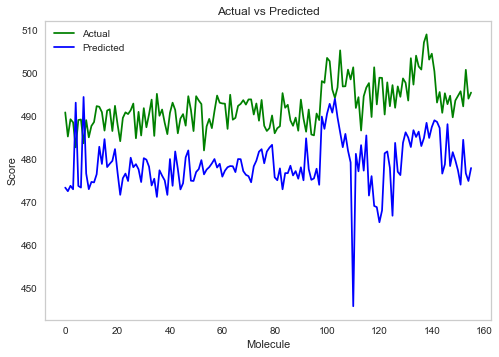

In [107]:

#Visualising the Acutal and predicted Result
plt.plot(target_test, color = 'green', label = 'Actual')
plt.plot(predictions, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.2)
plt.xlabel('Molecule')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
.

### Deep learning Optimization

In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import TensorBoard

In [109]:


LOG_DIR = f"{int(time.time())}"
tensorboard = TensorBoard(log_dir=LOG_DIR)



def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 30)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=3072,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4,1e-4,1e-5,1e-6])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
  
    max_trials=15,
    executions_per_trial=3,
    overwrite=True,

    directory=os.path.normpath(r'D:\ANANDSAHU\DNN-Models'),
    project_name=LOG_DIR)


tuner.search_space_summary()




tuner.search(x=X_train,
             y=y_train,
             epochs=100,
             batch_size=64,
             callbacks=[tensorboard],
             validation_data=(X_test, y_test))

tuner.results_summary()




Trial 15 Complete [00h 04m 11s]
val_mean_absolute_error: 4.214517116546631

Best val_mean_absolute_error So Far: 3.6834372679392495
Total elapsed time: 00h 49m 57s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in D:\ANANDSAHU\DNN-Models\1649070509
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 26
units_0: 1120
units_1: 1248
learning_rate: 0.01
units_2: 1536
units_3: 3008
units_4: 96
units_5: 1888
units_6: 2560
units_7: 2240
units_8: 1600
units_9: 1920
units_10: 2880
units_11: 928
units_12: 2304
units_13: 352
units_14: 2944
units_15: 736
units_16: 160
units_17: 2240
units_18: 1888
units_19: 384
units_20: 1504
units_21: 1696
units_22: 1024
units_23: 2016
units_24: 2336
units_25: 416
Score: 3.6834372679392495
Trial summary
Hyperparameters:
num_layers: 8
units_0: 1088
units_1: 768
learning_rate: 0.001
units_2: 160
units_3: 3040
units_4: 2848
units_5: 192
units_6: 2272
units_7: 544
units_8: 1216
un

In [110]:
with open(f"tuner_{int(time.time())}.pkl", "wb") as f:
    pickle.dump(tuner, f)

In [111]:
import pickle
tuner = pickle.load(open("tuner_1649074140.pkl","rb"))

In [112]:
tuner.results_summary()

Results summary
Results in D:\ANANDSAHU\DNN-Models\1649070509
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 26
units_0: 1120
units_1: 1248
learning_rate: 0.01
units_2: 1536
units_3: 3008
units_4: 96
units_5: 1888
units_6: 2560
units_7: 2240
units_8: 1600
units_9: 1920
units_10: 2880
units_11: 928
units_12: 2304
units_13: 352
units_14: 2944
units_15: 736
units_16: 160
units_17: 2240
units_18: 1888
units_19: 384
units_20: 1504
units_21: 1696
units_22: 1024
units_23: 2016
units_24: 2336
units_25: 416
Score: 3.6834372679392495
Trial summary
Hyperparameters:
num_layers: 8
units_0: 1088
units_1: 768
learning_rate: 0.001
units_2: 160
units_3: 3040
units_4: 2848
units_5: 192
units_6: 2272
units_7: 544
units_8: 1216
units_9: 2464
units_10: 2336
units_11: 992
units_12: 1504
units_13: 1536
units_14: 1664
units_15: 864
units_16: 672
units_17: 1216
units_18: 2464
units_19: 2112
units_20: 2976
Score: 3.733937978744507
Tri

In [113]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 26,
 'units_0': 1120,
 'units_1': 1248,
 'learning_rate': 0.01,
 'units_2': 1536,
 'units_3': 3008,
 'units_4': 96,
 'units_5': 1888,
 'units_6': 2560,
 'units_7': 2240,
 'units_8': 1600,
 'units_9': 1920,
 'units_10': 2880,
 'units_11': 928,
 'units_12': 2304,
 'units_13': 352,
 'units_14': 2944,
 'units_15': 736,
 'units_16': 160,
 'units_17': 2240,
 'units_18': 1888,
 'units_19': 384,
 'units_20': 1504,
 'units_21': 1696,
 'units_22': 1024,
 'units_23': 2016,
 'units_24': 2336,
 'units_25': 416}

In [114]:
models = tuner.get_best_models(num_models=1)

In [116]:
best_model = tuner.get_best_models()[0]

In [117]:
best_model.build(X_train.shape)

In [118]:
best_model.summary()
model = best_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1134, 1120)              28000     
                                                                 
 dense_1 (Dense)             (1134, 1248)              1399008   
                                                                 
 dense_2 (Dense)             (1134, 1536)              1918464   
                                                                 
 dense_3 (Dense)             (1134, 3008)              4623296   
                                                                 
 dense_4 (Dense)             (1134, 96)                288864    
                                                                 
 dense_5 (Dense)             (1134, 1888)              183136    
                                                                 
 dense_6 (Dense)             (1134, 2560)              4

In [119]:
history = History()


#Configure the model
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model.fit(X_train,y_train, validation_data=(X_val, y_val),epochs=100,batch_size=64)
              


result = model.evaluate(X_test,y_test)


for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/100
18/18 [==============================] - 2s 54ms/step - loss: 11974.6963 - mean_absolute_error: 90.0136 - val_loss: 3912.1042 - val_mean_absolute_error: 62.3662
Epoch 2/100
18/18 [==============================] - 1s 37ms/step - loss: 1559.0297 - mean_absolute_error: 34.3067 - val_loss: 27.9777 - val_mean_absolute_error: 4.4803
Epoch 3/100
18/18 [==============================] - 1s 36ms/step - loss: 219.7500 - mean_absolute_error: 12.8135 - val_loss: 27.9445 - val_mean_absolute_error: 4.0388
Epoch 4/100
18/18 [==============================] - 1s 35ms/step - loss: 61.5498 - mean_absolute_error: 6.4205 - val_loss: 41.9015 - val_mean_absolute_error: 5.5629
Epoch 5/100
18/18 [==============================] - 1s 36ms/step - loss: 32.0157 - mean_absolute_error: 4.5107 - val_loss: 25.0063 - val_mean_absolute_error: 3.8475
Epoch 6/100
18/18 [==============================] - 1s 36ms/step - loss: 22.8927 - mean_absolute_error: 3.7408 - val_loss: 19.6821 - val_mean_absolute_error:

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


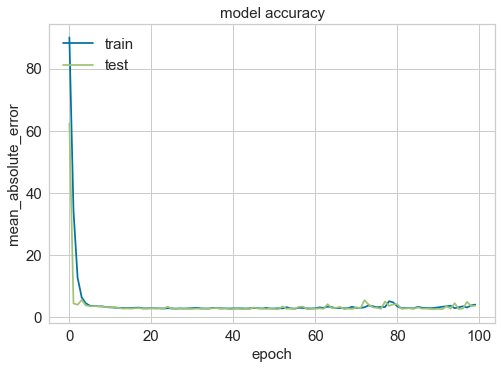

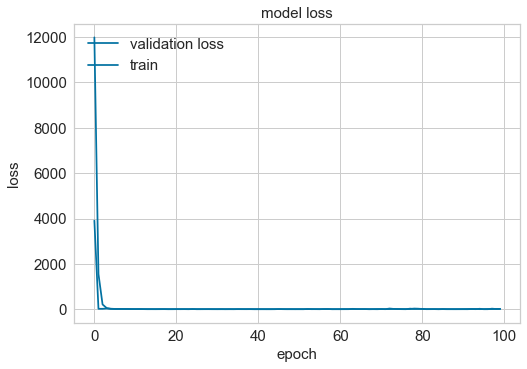

In [145]:
import matplotlib.pyplot as plt


SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 


# list all data in history
print(history.history.keys())



# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'], color='b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend([ 'validation loss', 'train'], loc='upper left')
plt.show()

In [121]:
model.evaluate(np.array(X_test), np.array(y_test))

5/5 [==============================] - 0s 8ms/step - loss: 20.5632 - mean_absolute_error: 3.7521


[20.563247680664062, 3.752095937728882]

In [149]:

# Predictions
import itertools

predictions = model.predict(X_test)
# predictions = list(itertools.islice(y, y_test.shape[0]))
predictions=predictions.reshape(141)
# y_test=y_test.reshape(33)
y_test=y_test


dataset = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
dataset

,Actual,Predicted
0,487.50,487.19
1,495.53,495.72
2,483.36,487.21
3,496.15,487.17
4,505.19,498.47
...,...,...
136,490.27,491.51
137,488.47,487.20
138,490.16,487.20
139,498.96,498.12


In [158]:
dataset["percent"] = ((dataset['Actual']-dataset['Predicted']) / (dataset['Actual'])) * 100
dataset=dataset.round(2)
dataset.to_csv("DNN-Prediction.csv")
dataset

,Actual,Predicted,percent
0,487.50,487.19,0.06
1,495.53,495.72,-0.04
2,483.36,487.21,-0.80
3,496.15,487.17,1.81
4,505.19,498.47,1.33
...,...,...,...
136,490.27,491.51,-0.25
137,488.47,487.20,0.26
138,490.16,487.20,0.60
139,498.96,498.12,0.17


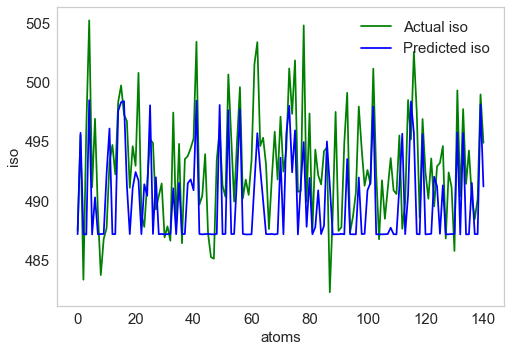

In [151]:



#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual iso')
plt.plot(predictions, color = 'blue', label = 'Predicted iso')
plt.grid(alpha = 0.2)
plt.xlabel('atoms')
plt.ylabel('iso')
# plt.title('Actual  vs Predicted')
plt.legend()
plt.show()

In [125]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


print('r2_score : ', r2_score(y_test, predictions) ) 

print('mean_squared_error : ', mean_squared_error(y_test, predictions) ) 

r2_score :  0.020653678424208732
mean_squared_error :  20.563238065300013
